In [1]:
# Load libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# from kerastuner.tuners import BayesianOptimization


from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf



#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

# Ignore all GPUs, tf random forest does not benefit from it.
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

/home/dl_/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2022-08-03 11:42:04.436616: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-03 11:42:04.436654: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df_btc = pd.read_csv('BTC-USD.csv', parse_dates=['dt'], dayfirst=True)
df_btc['dt'] = df_btc['dt'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
df_btc = df_btc[['dt','BTC_AdjClose']]
# df_btc = df_btc.set_index('dt')
df_btc.dtypes

dt              datetime64[ns]
BTC_AdjClose           float64
dtype: object

In [3]:
tickers = ['TSLA'#, 'AAPL'
            ]



df = pd.read_csv('combined_dataset_daily_sentiment_TSLA_AAPL.csv')
df['dt'] = df['dt'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
df = df.set_index('dt')

df = df[['TSLA_AdjClose', #'TSLA_Open', 'TSLA_High', 'TSLA_Low',
       'TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high', 'TSLA_14-low',
       'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P', 'DFF', 'DGS3MO',
       'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS', 'USEPUINDXD',
       'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E'#,'sentiment_vader','total_msgs'
        ]]

# set daterange for model
# end_date = '2021-08-01'

# df = df.loc[:end_date]
df.columns

Index(['TSLA_AdjClose', 'TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high',
       'TSLA_14-low', 'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P',
       'DFF', 'DGS3MO', 'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS',
       'USEPUINDXD', 'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E'],
      dtype='object')

In [4]:
df

TSLA_AdjClose  TSLA_Volume  AAPL_AdjClose  TSLA_14-high  \
dt                                                                    
2012-11-05       6.300000   10244500.0      17.928806      6.316000   
2012-11-06       6.230000   11620000.0      17.874533      6.316000   
2012-11-07       6.308000    8572500.0      17.190607      6.410000   
2012-11-08       6.262000    6370000.0      16.566753      6.410000   
2012-11-09       6.064000    4315000.0      16.853561      6.410000   
...                   ...          ...            ...           ...   
2022-07-26     776.580017   22273600.0     151.600006    842.359985   
2022-07-27     824.460022   29370000.0     156.789993    842.359985   
2022-07-28     842.700012   28241000.0     157.350006    849.900024   
2022-07-29     891.450012   31771000.0     162.509995    894.960022   
2022-08-01     891.830017   39014300.0     161.509995    935.630005   

            TSLA_14-low    TSLA_%K    TSLA_%D    TSLA_%R   TSLA_RSI      S&P  \
dt                                                                             
2012-11-05     5.372000  98.305106  88.586524   1.694894  65.094551  1417.26   
2012-11-06     5.404000  90.570181  88.485070   9.429819  62.733128  1428.39   
2012-11-07     5.404000  89.860859  92.912049  10.139141  64.287757  1394.53   
2012-11-08     5.404000  85.288295  88.573112  14.711705  62.628464  1377.51   
2012-11-09     5.404000  65.606391  80.251848  34.393609  55.936108  1379.85   
...                 ...        ...        ...        ...        ...      ...   
2022-07-26   675.099976  60.672029  75.098009  39.327971  57.026327  3921.05   
2022-07-27   675.099976  89.298121  75.937677  10.701879  63.699169  3921.05   
2022-07-28   675.099976  95.881001  81.950384   4.118999  65.873169  3921.05   
2022-07-29   675.099976  98.403525  94.527549   1.596475  70.890890  3921.05   
2022-08-01   675.099976  83.188123  92.490883  16.811877  70.926774  3921.05   

             DFF  DGS3MO  DGS6MO  DGS10  BAMLH0A0HYM2  VXIBMCLS  USEPUINDXD  \
dt                                                                            
2012-11-05  0.17    0.11    0.15   1.72          5.57     19.64      225.43   
2012-11-06  0.16    0.10    0.15   1.78          5.49     19.60      195.50   
2012-11-07  0.16    0.10    0.14   1.68          5.63     20.49      358.00   
2012-11-08  0.16    0.10    0.15   1.62          5.67     20.85      241.14   
2012-11-09  0.16    0.09    0.15   1.61          5.77     20.82      278.07   
...          ...     ...     ...    ...           ...       ...         ...   
2022-07-26  1.58    2.62    3.06   2.81          5.06     25.24       30.93   
2022-07-27  1.58    2.62    3.06   2.81          5.06     25.24       30.93   
2022-07-28  1.58    2.62    3.06   2.81          5.06     25.24       30.93   
2022-07-29  1.58    2.62    3.06   2.81          5.06     25.24       30.93   
2022-08-01  1.58    2.62    3.06   2.81          5.06     25.24       30.93   

            DCOILWTICO  TSLA_EPS_diluted    TSLA_P/E  
dt                                                    
2012-11-05       85.64           -0.7440   -8.467742  
2012-11-06       88.62           -0.7440   -8.373656  
2012-11-07       84.50           -0.7440   -8.478495  
2012-11-08       85.07           -0.7440   -8.416667  
2012-11-09       86.08           -0.7440   -8.150538  
...                ...               ...         ...  
2022-07-26       99.83            8.3024   93.536811  
2022-07-27       99.83            8.3024   99.303818  
2022-07-28       99.83            8.3024  101.500772  
2022-07-29       99.83            8.3024  107.372568  
2022-08-01       99.83            8.3024  107.418339  

[3555 rows x 20 columns]

In [5]:
# set daterange for model
end_date = '2021-08-30'

df2 = pd.merge(df, df_btc, how='outer', on='dt')
df2 = df2.set_index('dt')
df2['BTC_AdjClose'].replace(np.nan, 0, inplace=True)
df2 = df2.loc[:end_date]
df2.reindex()

TSLA_AdjClose  TSLA_Volume  AAPL_AdjClose  TSLA_14-high  \
dt                                                                    
2012-11-05       6.300000   10244500.0      17.928806      6.316000   
2012-11-06       6.230000   11620000.0      17.874533      6.316000   
2012-11-07       6.308000    8572500.0      17.190607      6.410000   
2012-11-08       6.262000    6370000.0      16.566753      6.410000   
2012-11-09       6.064000    4315000.0      16.853561      6.410000   
...                   ...          ...            ...           ...   
2021-08-26     701.159973   13214300.0     146.921646    729.900024   
2021-08-27     711.919983   13833800.0     147.977219    729.900024   
2021-08-28     711.919983   13833800.0     147.977219    729.900024   
2021-08-29     711.919983   13833800.0     147.977219    729.900024   
2021-08-30     730.909973   18604200.0     152.478256    731.000000   

            TSLA_14-low    TSLA_%K    TSLA_%D    TSLA_%R   TSLA_RSI      S&P  \
dt                                                                             
2012-11-05     5.372000  98.305106  88.586524   1.694894  65.094551  1417.26   
2012-11-06     5.404000  90.570181  88.485070   9.429819  62.733128  1428.39   
2012-11-07     5.404000  89.860859  92.912049  10.139141  64.287757  1394.53   
2012-11-08     5.404000  85.288295  88.573112  14.711705  62.628464  1377.51   
2012-11-09     5.404000  65.606391  80.251848  34.393609  55.936108  1379.85   
...                 ...        ...        ...        ...        ...      ...   
2021-08-26   648.840027  64.544717  71.687598  35.455283  53.984633  4470.00   
2021-08-27   648.840027  77.818848  73.098073  22.181152  57.017706  4509.37   
2021-08-28   648.840027  77.818848  73.098073  22.181152  57.017706  4509.37   
2021-08-29   648.840027  77.818848  73.098073  22.181152  57.017706  4509.37   
2021-08-30   648.840027  99.890425  80.751330   0.109575  61.802974  4528.79   

            ...  DGS3MO  DGS6MO  DGS10  BAMLH0A0HYM2  VXIBMCLS  USEPUINDXD  \
dt          ...                                                              
2012-11-05  ...    0.11    0.15   1.72          5.57     19.64      225.43   
2012-11-06  ...    0.10    0.15   1.78          5.49     19.60      195.50   
2012-11-07  ...    0.10    0.14   1.68          5.63     20.49      358.00   
2012-11-08  ...    0.10    0.15   1.62          5.67     20.85      241.14   
2012-11-09  ...    0.09    0.15   1.61          5.77     20.82      278.07   
...         ...     ...     ...    ...           ...       ...         ...   
2021-08-26  ...    0.05    0.06   1.34          3.20     20.68       54.90   
2021-08-27  ...    0.05    0.05   1.31          3.17     19.41       69.52   
2021-08-28  ...    0.05    0.05   1.31          3.17     19.41      147.47   
2021-08-29  ...    0.05    0.05   1.31          3.17     19.41      105.19   
2021-08-30  ...    0.05    0.05   1.29          3.16     20.02       77.75   

            DCOILWTICO  TSLA_EPS_diluted    TSLA_P/E  BTC_AdjClose  
dt                                                                  
2012-11-05       85.64           -0.7440   -8.467742       0.00000  
2012-11-06       88.62           -0.7440   -8.373656       0.00000  
2012-11-07       84.50           -0.7440   -8.478495       0.00000  
2012-11-08       85.07           -0.7440   -8.416667       0.00000  
2012-11-09       86.08           -0.7440   -8.150538       0.00000  
...                ...               ...         ...           ...  
2021-08-26       67.42            1.9191  365.358748   46942.21875  
2021-08-27       68.84            1.9191  370.965548   49058.66797  
2021-08-28       68.84            1.9191  370.965548   48902.40234  
2021-08-29       68.84            1.9191  370.965548   48829.83203  
2021-08-30       69.28            1.9191  380.860806   47054.98438  

[3221 rows x 21 columns]

## Standardize Data

In [6]:
# scaler = StandardScaler().fit(df)
# scaled_data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index = df.index)
# scaled_data


In [7]:
df.columns

Index(['TSLA_AdjClose', 'TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high',
       'TSLA_14-low', 'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P',
       'DFF', 'DGS3MO', 'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS',
       'USEPUINDXD', 'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E'],
      dtype='object')

In [8]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

#fit multiple linear regression model
model = ols("TSLA_AdjClose ~ AAPL_AdjClose", data=df).fit()
display(durbin_watson(model.resid))

#view model summary
print(model.summary())

0.012729401238700786

                            OLS Regression Results                            
Dep. Variable:          TSLA_AdjClose   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 3.347e+04
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:42:06   Log-Likelihood:                -21054.
No. Observations:                3555   AIC:                         4.211e+04
Df Residuals:                    3553   BIC:                         4.212e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -140.1489      2.377    -58.949

## Lagged Returns

In [9]:
# lagged returns

return_period = 5

Y = np.log(df2[tickers[0]+'_AdjClose']).diff(return_period).shift(-return_period)

Y.name = Y.name +'_pred'

lagged_data_0 = [ tickers[0]+'_%K', tickers[0]+'_%D', tickers[0]+'_%R',tickers[0]+'_RSI']
lagged_data_14 = [tickers[0]+'_14-high', tickers[0]+'_14-low']

try:
    lagged_data_1 = [tickers[1]+'_14-high', tickers[1]+'_14-low', tickers[1]+'_%K', tickers[1]+'_%D', tickers[1]+'_%R', tickers[1]+'_RSI']
    lagged_data = lagged_data_0 + lagged_data_1
except:
    lagged_data = lagged_data_0

response_variables = [tickers[0]+'_AdjClose']

X1 = df2.loc[:, ~df2.columns.isin([*lagged_data, *response_variables])].select_dtypes(exclude='object')
X1_lagged = np.log(X1).shift(-return_period)
X2 = df2.loc[:, df2.columns.isin([*lagged_data_0])]
X2_lagged = np.log(X2/100)
X3 = df2.loc[:, df2.columns.isin([*lagged_data_14])]
X3_norm = np.log(X3)
X = pd.concat([X1_lagged, X2_lagged, X3_norm], axis=1)

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.replace(np.nan, 0, inplace=True)
Y.replace([np.inf, -np.inf], np.nan, inplace=True)
Y.replace(np.nan, 0, inplace=True)

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [10]:
dataset

TSLA_AdjClose_pred  TSLA_Volume  AAPL_AdjClose  TSLA_14-high  \
dt                                                                         
2012-11-05           -0.038180    15.277608       2.824562      1.857859   
2012-11-10            0.016356    15.408819       2.784583      1.860041   
2012-11-15            0.068344    15.344281       2.849564      1.894617   
2012-11-20           -0.026717    14.581676       2.868268      1.901212   
2012-11-25            0.051262    15.775817       2.892094      1.925416   
...                        ...          ...            ...           ...   
2021-08-10            0.010062    16.632804       5.000417      6.592908   
2021-08-15           -0.052838    16.512965       4.994295      6.592908   
2021-08-20            0.044479    16.352820       4.995442      6.592908   
2021-08-25            0.027337    16.738898       5.027022      6.594413   
2021-08-30            0.000000     0.000000       0.000000      0.000000   

            TSLA_14-low       S&P       DFF    DGS3MO    DGS6MO     DGS10  \
dt                                                                          
2012-11-05     1.687139  7.229730 -1.832581 -2.407946 -1.897120  0.476234   
2012-11-10     1.687139  7.210324 -1.832581 -2.525729 -1.966113  0.457425   
2012-11-15     1.729884  7.235482 -1.832581 -2.525729 -1.966113  0.506818   
2012-11-20     1.769173  7.250742 -1.832581 -2.302585 -1.966113  0.530628   
2012-11-25     1.797079  7.255718 -1.832581 -2.525729 -2.040221  0.482426   
...                 ...       ...       ...       ...       ...       ...   
2021-08-10     6.441329  8.404696 -2.302585 -2.813411 -2.995732  0.254642   
2021-08-15     6.475186  8.398786 -2.407946 -2.995732 -2.995732  0.231112   
2021-08-20     6.475186  8.410986 -2.407946 -2.813411 -2.813411  0.300105   
2021-08-25     6.475186  8.418210 -2.525729 -2.995732 -2.995732  0.254642   
2021-08-30     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            ...  DCOILWTICO  TSLA_EPS_diluted  TSLA_P/E  BTC_AdjClose  \
dt          ...                                                         
2012-11-05  ...    4.455277          0.000000  0.000000      0.000000   
2012-11-10  ...    4.447931          0.000000  0.000000      0.000000   
2012-11-15  ...    4.459682          0.000000  0.000000      0.000000   
2012-11-20  ...    4.466023          0.000000  0.000000      0.000000   
2012-11-25  ...    4.483454          0.000000  0.000000      0.000000   
...         ...         ...               ...       ...           ...   
2021-08-10  ...    4.224788          0.651856  5.923457     10.758902   
2021-08-15  ...    4.131159          0.651856  5.870619     10.806474   
2021-08-20  ...    4.227418          0.651856  5.915097     10.798775   
2021-08-25  ...    4.238156          0.651856  5.942434     10.759072   
2021-08-30  ...    0.000000          0.000000  0.000000      0.000000   

             TSLA_%K   TSLA_%D   TSLA_%R  TSLA_RSI  TSLA_14-high  TSLA_14-low  
dt                                                                             
2012-11-05 -0.017094 -0.121190 -4.077550 -0.429329      1.843086     1.681200  
2012-11-10 -0.421497 -0.220000 -1.067299 -0.580960      1.857859     1.687139  
2012-11-15 -0.294239 -0.177324 -1.366877 -0.573397      1.860041     1.687139  
2012-11-20 -0.050773 -0.054995 -3.005679 -0.416595      1.894617     1.729884  
2012-11-25 -0.391076 -0.213370 -1.128027 -0.518998      1.901212     1.769173  
...              ...       ...       ...       ...           ...          ...  
2021-08-10 -0.186342 -0.215442 -1.771897 -0.469982      6.588844     6.441329  
2021-08-15 -0.132391 -0.128901 -2.087458 -0.461912      6.592908     6.441329  
2021-08-20 -0.947746 -0.927374 -0.490392 -0.709786      6.592908     6.475186  
2021-08-25 -0.262266 -0.303794 -1.466665 -0.553381      6.592908     6.475186  
2021-08-30 -0.001096 -0.213796 -6.816315 -0.481219      6.594413     6.475186  

[645 rows x 23 columns]

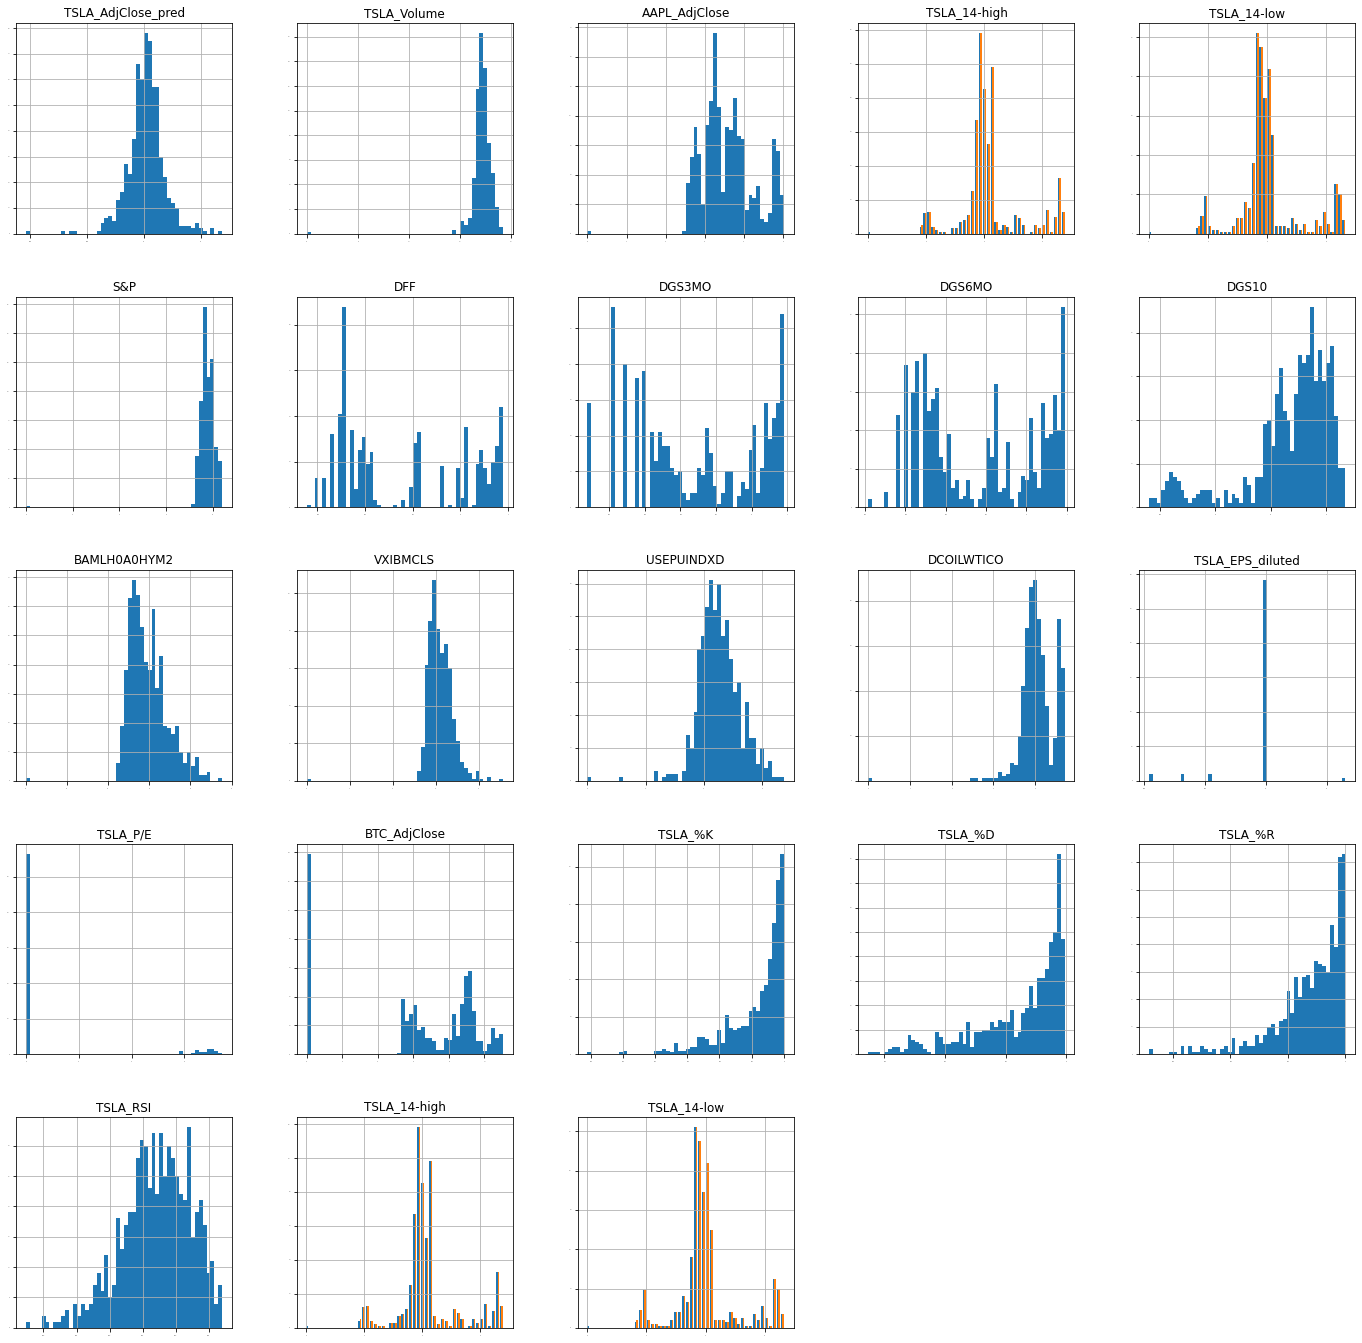

In [11]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(24,24))
pyplot.show();

<AxesSubplot:title={'center':'Correlation Matrix'}>

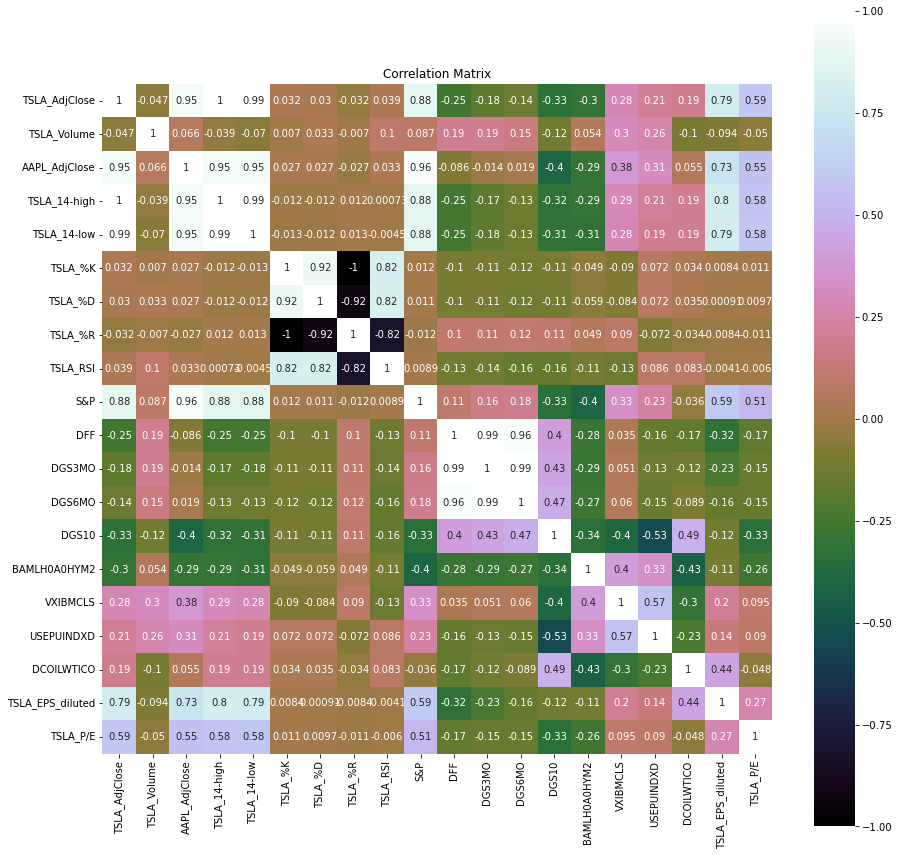

In [12]:
correlation = df.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

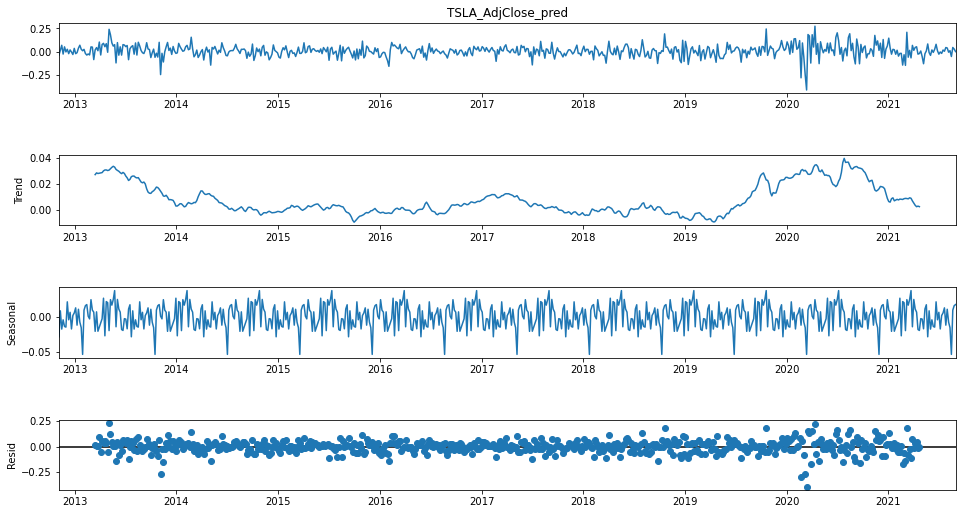

In [13]:
res = sm.tsa.seasonal_decompose(Y,  period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

In [14]:
dataset

TSLA_AdjClose_pred  TSLA_Volume  AAPL_AdjClose  TSLA_14-high  \
dt                                                                         
2012-11-05           -0.038180    15.277608       2.824562      1.857859   
2012-11-10            0.016356    15.408819       2.784583      1.860041   
2012-11-15            0.068344    15.344281       2.849564      1.894617   
2012-11-20           -0.026717    14.581676       2.868268      1.901212   
2012-11-25            0.051262    15.775817       2.892094      1.925416   
...                        ...          ...            ...           ...   
2021-08-10            0.010062    16.632804       5.000417      6.592908   
2021-08-15           -0.052838    16.512965       4.994295      6.592908   
2021-08-20            0.044479    16.352820       4.995442      6.592908   
2021-08-25            0.027337    16.738898       5.027022      6.594413   
2021-08-30            0.000000     0.000000       0.000000      0.000000   

            TSLA_14-low       S&P       DFF    DGS3MO    DGS6MO     DGS10  \
dt                                                                          
2012-11-05     1.687139  7.229730 -1.832581 -2.407946 -1.897120  0.476234   
2012-11-10     1.687139  7.210324 -1.832581 -2.525729 -1.966113  0.457425   
2012-11-15     1.729884  7.235482 -1.832581 -2.525729 -1.966113  0.506818   
2012-11-20     1.769173  7.250742 -1.832581 -2.302585 -1.966113  0.530628   
2012-11-25     1.797079  7.255718 -1.832581 -2.525729 -2.040221  0.482426   
...                 ...       ...       ...       ...       ...       ...   
2021-08-10     6.441329  8.404696 -2.302585 -2.813411 -2.995732  0.254642   
2021-08-15     6.475186  8.398786 -2.407946 -2.995732 -2.995732  0.231112   
2021-08-20     6.475186  8.410986 -2.407946 -2.813411 -2.813411  0.300105   
2021-08-25     6.475186  8.418210 -2.525729 -2.995732 -2.995732  0.254642   
2021-08-30     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            ...  DCOILWTICO  TSLA_EPS_diluted  TSLA_P/E  BTC_AdjClose  \
dt          ...                                                         
2012-11-05  ...    4.455277          0.000000  0.000000      0.000000   
2012-11-10  ...    4.447931          0.000000  0.000000      0.000000   
2012-11-15  ...    4.459682          0.000000  0.000000      0.000000   
2012-11-20  ...    4.466023          0.000000  0.000000      0.000000   
2012-11-25  ...    4.483454          0.000000  0.000000      0.000000   
...         ...         ...               ...       ...           ...   
2021-08-10  ...    4.224788          0.651856  5.923457     10.758902   
2021-08-15  ...    4.131159          0.651856  5.870619     10.806474   
2021-08-20  ...    4.227418          0.651856  5.915097     10.798775   
2021-08-25  ...    4.238156          0.651856  5.942434     10.759072   
2021-08-30  ...    0.000000          0.000000  0.000000      0.000000   

             TSLA_%K   TSLA_%D   TSLA_%R  TSLA_RSI  TSLA_14-high  TSLA_14-low  
dt                                                                             
2012-11-05 -0.017094 -0.121190 -4.077550 -0.429329      1.843086     1.681200  
2012-11-10 -0.421497 -0.220000 -1.067299 -0.580960      1.857859     1.687139  
2012-11-15 -0.294239 -0.177324 -1.366877 -0.573397      1.860041     1.687139  
2012-11-20 -0.050773 -0.054995 -3.005679 -0.416595      1.894617     1.729884  
2012-11-25 -0.391076 -0.213370 -1.128027 -0.518998      1.901212     1.769173  
...              ...       ...       ...       ...           ...          ...  
2021-08-10 -0.186342 -0.215442 -1.771897 -0.469982      6.588844     6.441329  
2021-08-15 -0.132391 -0.128901 -2.087458 -0.461912      6.592908     6.441329  
2021-08-20 -0.947746 -0.927374 -0.490392 -0.709786      6.592908     6.475186  
2021-08-25 -0.262266 -0.303794 -1.466665 -0.553381      6.592908     6.475186  
2021-08-30 -0.001096 -0.213796 -6.816315 -0.481219      6.594413     6.475186  

[645 rows x 23 columns]

In [15]:
# fig, axs = plt.subplots(1,1, figsize=(12,8))

# axs.plot( dataset['TSLA_AdjClose_pred'], label = "actual value", color = 'blue' )
# #axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "LR predicted value", color = 'red', marker='D')
# axs.plot( dataset['TSLA_%K'], label = "LSTM predicted value", color = 'green')

# axs.set( 
#        xlabel='Date', 
#        ylabel='percentage change in 5 days',
#        title='Feature engineering')
# axs.xaxis.label.set_size(15)
# axs.yaxis.label.set_size(15)
# axs.yaxis.label.set_size(15)

# axs.title.set_size(15)

In [16]:
# dataset.to_csv('dataset_tsla_aapl.csv')

In [17]:
end_date = '2021-07-05'



X = X.loc[:end_date]

Y = Y.loc[:end_date]
dataset = dataset.loc[:end_date]

In [18]:
X.shape

(633, 26)

In [19]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

Score
Specs                     
DGS10             7.620062
DFF               3.189416
VXIBMCLS          2.997578
USEPUINDXD        2.571015
TSLA_Volume       2.366126
TSLA_RSI          1.541056
TSLA_EPS_diluted  1.481475
BTC_AdjClose      1.439718
DGS6MO            1.205102
TSLA_14-low       0.722238

# Based on best features, we drop TSLA_high, low, and open

In [20]:
# X = X.loc[:, ~X.columns.isin([''])].select_dtypes(exclude='object')

In [21]:
validation_size = 0.05

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [22]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

In [23]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
# models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(max_depth=5
)))
models.append(('SVR', SVR()))

In [24]:
# Boosting methods
# models.append(('ABR', AdaBoostRegressor()))
# models.append(('GBR', GradientBoostingRegressor()))

# Bagging methods
models.append(('RFR', RandomForestRegressor(max_depth=5
)))
models.append(('ETR', ExtraTreesRegressor(max_depth=5
)))

In [25]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds) #, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    

    print(f'{name: <10} cv_mean: {cv_results.mean():.3f}, cv_std: {cv_results.std():.3f}, train: {train_result:.3f}, test: {test_result:.3f}')

LR         cv_mean: 0.004, cv_std: 0.002, train: 0.003, test: 0.007
LASSO      cv_mean: 0.004, cv_std: 0.003, train: 0.004, test: 0.005
KNN        cv_mean: 0.007, cv_std: 0.009, train: 0.003, test: 0.006
CART       cv_mean: 0.015, cv_std: 0.029, train: 0.003, test: 0.015
SVR        cv_mean: 0.004, cv_std: 0.003, train: 0.004, test: 0.009
RFR        cv_mean: 0.006, cv_std: 0.005, train: 0.003, test: 0.006
ETR        cv_mean: 0.005, cv_std: 0.004, train: 0.003, test: 0.007


In [26]:
from sklearn import tree
regr = tree.DecisionTreeRegressor()
model = regr.fit(X_train, Y_train)
text_representation = tree.export_text(regr)
print(text_representation)

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, 
#                    feature_names=iris.feature_names,  
#                    class_names=iris.target_names,
#                    filled=True)

|--- feature_12 <= 4.23
|   |--- feature_1 <= 4.10
|   |   |--- feature_5 <= 3.60
|   |   |   |--- feature_0 <= 18.76
|   |   |   |   |--- feature_19 <= -0.08
|   |   |   |   |   |--- feature_20 <= -0.09
|   |   |   |   |   |   |--- feature_22 <= 3.91
|   |   |   |   |   |   |   |--- feature_1 <= 2.61
|   |   |   |   |   |   |   |   |--- feature_19 <= -0.43
|   |   |   |   |   |   |   |   |   |--- feature_20 <= -0.81
|   |   |   |   |   |   |   |   |   |   |--- feature_10 <= 0.75
|   |   |   |   |   |   |   |   |   |   |   |--- value: [-0.04]
|   |   |   |   |   |   |   |   |   |   |--- feature_10 >  0.75
|   |   |   |   |   |   |   |   |   |   |   |--- value: [-0.04]
|   |   |   |   |   |   |   |   |   |--- feature_20 >  -0.81
|   |   |   |   |   |   |   |   |   |   |--- feature_19 <= -0.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_19 >  -0.75
|   |   |   |   |   |   |   |   |   |   |   |--- value:

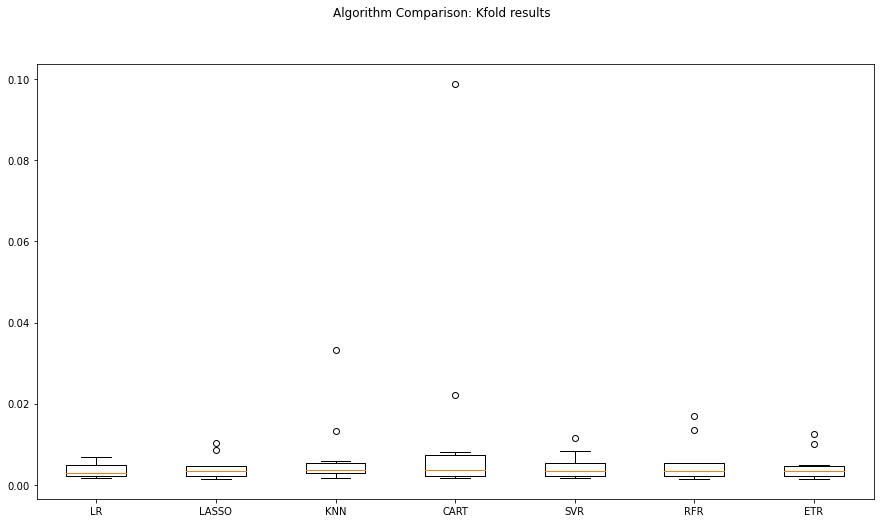

In [27]:

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

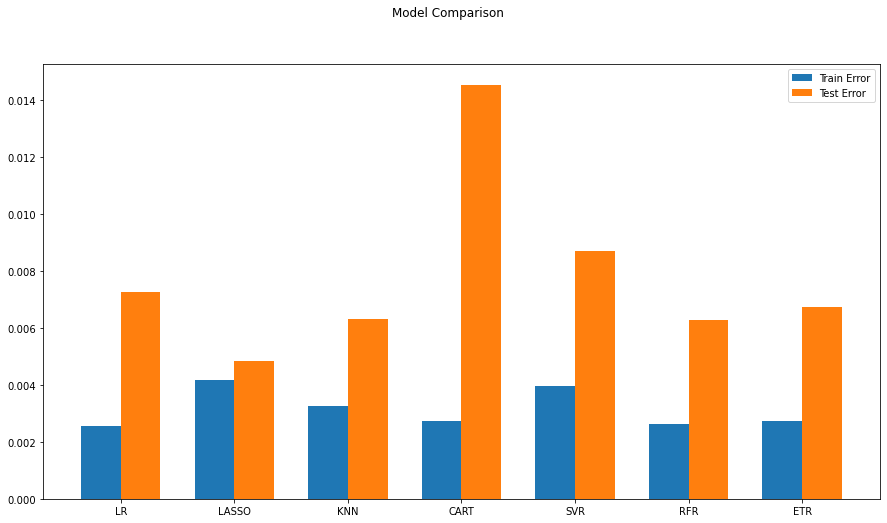

In [28]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

# First ARIMA Model

In [29]:
X_train_ARIMA=X_train.loc[:, [
       #'TSLA_Open', 'TSLA_High', 'TSLA_Low',
       'TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high', 'TSLA_14-low',
       'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P', 'DFF', 'DGS3MO',
       'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS', 'USEPUINDXD',
       'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E'#,'sentiment_vader','total_msgs'
]]
X_test_ARIMA=X_test.loc[:, [
       #'TSLA_Open', 'TSLA_High', 'TSLA_Low',
       'TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high', 'TSLA_14-low',
       'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P', 'DFF', 'DGS3MO',
       'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS', 'USEPUINDXD',
       'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E'#,'sentiment_vader', 'total_msgs'
]]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [30]:
modelARIMA=sm.tsa.ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

In [31]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

0.007489617685427742

In [32]:
test_results.append(error_Test_ARIMA)
train_results.append(error_Training_ARIMA)
names.append("ARIMA")


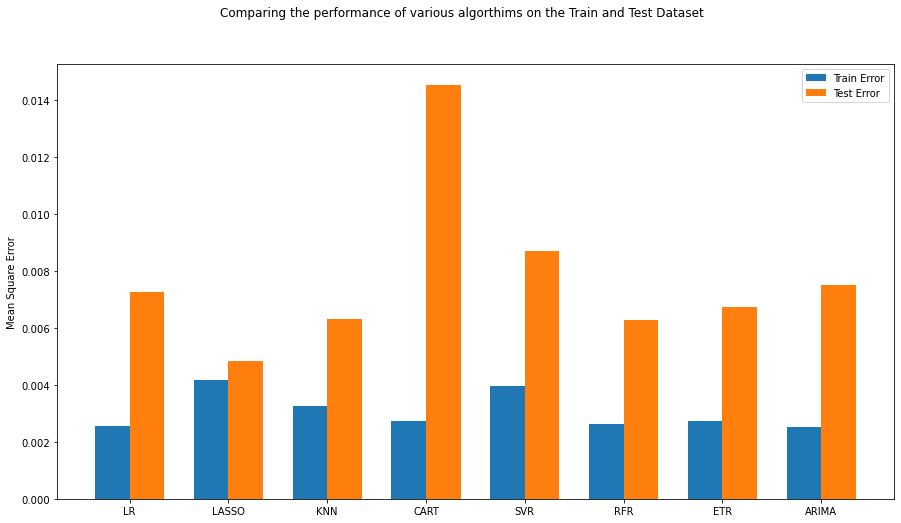

In [33]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

# LSTM and Time Series Based Models

In [34]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [35]:
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, #validation_data=(X_test_LSTM, Y_test_LSTM)
                validation_split=0.5,epochs=330, batch_size=72, verbose=0, shuffle=False)

2022-08-03 11:42:15.968296: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-03 11:42:15.968336: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-03 11:42:15.968353: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-LJ3SJ1H): /proc/driver/nvidia/version does not exist
2022-08-03 11:42:15.968504: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


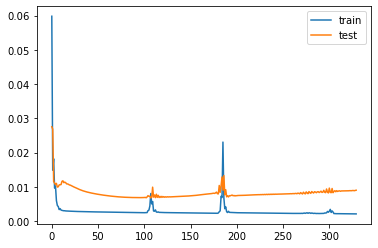

In [36]:
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [37]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

1/1 [==============================] - 0s 12ms/step


In [38]:
test_results.append(error_Test_LSTM)
train_results.append(error_Training_LSTM)
names.append("LSTM")

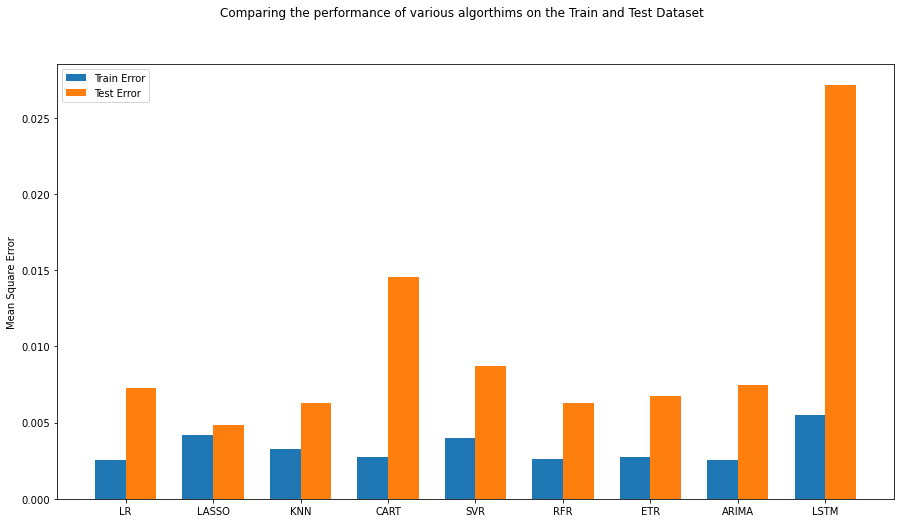

In [39]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

In [40]:
test_results

[0.007260586210431902,
 0.004848399627421507,
 0.006308332377771895,
 0.014533533263887531,
 0.008689375936114685,
 0.006260861798786604,
 0.006742778781226758,
 0.007489617685427742,
 0.02717900598917092]

# Tune ARIMA Model

In [41]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')
#Grid Search for ARIMA Model
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=sm.tsa.ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
#warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values) 

ARIMA(0, 0, 0) MSE=0.0025402
ARIMA(0, 0, 1) MSE=0.0025303
ARIMA(0, 1, 0) MSE=0.0628116
ARIMA(0, 1, 1) MSE=0.0525025
ARIMA(1, 0, 0) MSE=0.0025299
ARIMA(1, 0, 1) MSE=0.0025413
ARIMA(1, 1, 0) MSE=0.0584829
ARIMA(1, 1, 1) MSE=0.0496359
ARIMA(2, 0, 0) MSE=0.0025282
ARIMA(2, 0, 1) MSE=0.0025400
ARIMA(2, 1, 0) MSE=0.0588226
ARIMA(2, 1, 1) MSE=0.0558107
Best ARIMA(2, 0, 0) MSE=0.0025282


In [42]:
# prepare model
modelARIMA_tuned=sm.tsa.ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,0])
model_fit_tuned = modelARIMA_tuned.fit()

In [43]:
# estimate accuracy on validation set
predicted_tuned = model_fit_tuned.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

0.007550629228876662


In [44]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit_tuned.fittedvalues)
predicted = model_fit_tuned.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

0.007550629228876662

In [45]:
test_results.append(error_Test_ARIMA)
train_results.append(error_Training_ARIMA)
names.append("ARIMA_tuned")


In [46]:
len(train_results)

10

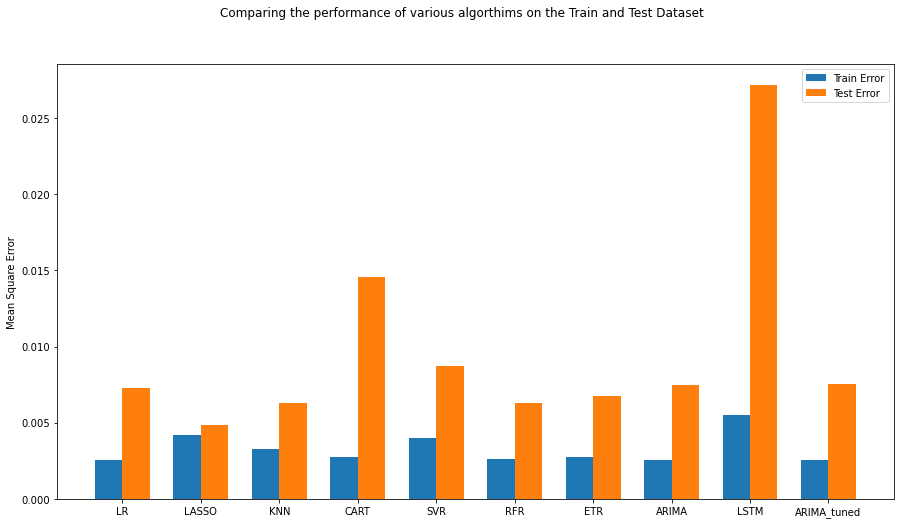

In [47]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

# LR Model - Stock, lagged return plots

In [48]:
 # Full Training period linear model
    
LRtest = LinearRegression().fit(X_train, Y_train)
train_result = mean_squared_error(LRtest.predict(X_train), Y_train)
# train_results.append(train_result)
    
# Test results
test_result = mean_squared_error(LRtest.predict(X_test), Y_test)



In [49]:
LRtest.coef_

array([-7.12556841e-03, -7.90087864e-03,  3.87899537e-01, -3.65509017e-01,
        1.95175952e-01, -2.32075438e-01,  1.67457281e-01, -1.05655408e-02,
        4.03680999e-03, -1.19556824e-02,  1.86117173e-02, -6.36717813e-03,
       -3.02992717e-02,  7.39018685e-03, -2.06900946e-02,  4.06405003e-02,
        3.87775455e-03,  2.50349094e-04, -9.84527123e-03, -3.78541875e-03,
        1.08095757e-02, -2.83795831e-02,  3.87899537e-01, -3.65509017e-01,
        1.95175952e-01, -2.32075438e-01])

In [50]:
LRtest.intercept_

-0.9385159417017203

In [51]:
res_LR = LRtest.predict(X_test)

In [52]:
s = Y_test.to_frame()
s['LM_predicted'] = res_LR
s

TSLA_AdjClose_pred  LM_predicted
dt                                          
2021-01-27           -0.028582     -0.000653
2021-02-01            0.014681      0.025391
2021-02-06           -0.048775      0.020008
2021-02-11           -0.019206      0.036110
2021-02-16           -0.018916      0.037935
2021-02-21           -0.145506     -0.030054
2021-02-26           -0.033570      0.022742
2021-03-03           -0.148604     -0.009350
2021-03-08            0.208803      0.045564
2021-03-13           -0.060261      0.023188
2021-03-18            0.013685      0.050927
2021-03-23           -0.067870      0.089323
2021-03-28            0.067251      0.064776
2021-04-02            0.013837      0.048937
2021-04-07            0.045181      0.034944
2021-04-12            0.052448      0.090327
2021-04-17           -0.027532      0.087203
2021-04-22           -0.020992      0.074663
2021-04-27            0.006647      0.085497
2021-05-02           -0.053667      0.049798
2021-05-07           -0.130873      0.033090
2021-05-12           -0.022388      0.082454
2021-05-17            0.006997      0.085028
2021-05-22            0.082524      0.078018
2021-05-27           -0.011078      0.044706
2021-06-01           -0.040645      0.063567
2021-06-06            0.017934      0.097532
2021-06-11           -0.008265      0.069702
2021-06-16            0.026044      0.063733
2021-06-21            0.079008      0.139278
2021-06-26            0.008964      0.050344
2021-07-01           -0.027426      0.047877

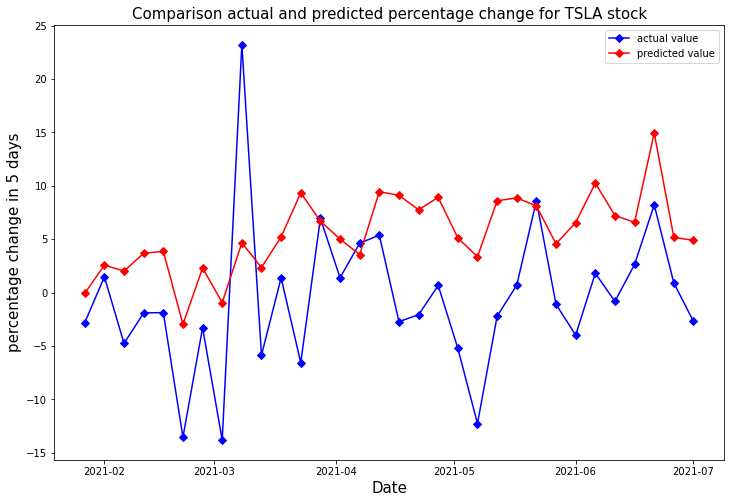

In [53]:
fig, axs = plt.subplots(1,1, figsize=(12,8))

axs.plot( (np.exp(s['TSLA_AdjClose_pred'])-1)*100, label = "actual value", color = 'blue', marker='D')
axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "predicted value", color = 'red', marker='D')

axs.set( 
       xlabel='Date', 
       ylabel='percentage change in 5 days',
       title=f'Comparison actual and predicted percentage change for {tickers[0]} stock')
axs.legend()
axs.xaxis.label.set_size(15)
axs.yaxis.label.set_size(15)
axs.yaxis.label.set_size(15)

axs.title.set_size(15)

# LSTM Model - Stock, lagged return plots

In [54]:
res_LSTM = LSTMModel.predict(X_test_LSTM)
# res_LSTM.tolist() # works for javier.

1/1 [==============================] - 0s 11ms/step


In [55]:
s['LSTM_predicted'] = res_LSTM
s

TSLA_AdjClose_pred  LM_predicted  LSTM_predicted
dt                                                          
2021-01-27           -0.028582     -0.000653        0.149480
2021-02-01            0.014681      0.025391        0.127692
2021-02-06           -0.048775      0.020008        0.133237
2021-02-11           -0.019206      0.036110        0.127076
2021-02-16           -0.018916      0.037935        0.111501
2021-02-21           -0.145506     -0.030054        0.099059
2021-02-26           -0.033570      0.022742        0.115715
2021-03-03           -0.148604     -0.009350        0.100866
2021-03-08            0.208803      0.045564        0.110565
2021-03-13           -0.060261      0.023188        0.125130
2021-03-18            0.013685      0.050927        0.160093
2021-03-23           -0.067870      0.089323        0.169052
2021-03-28            0.067251      0.064776        0.166583
2021-04-02            0.013837      0.048937        0.141766
2021-04-07            0.045181      0.034944        0.161550
2021-04-12            0.052448      0.090327        0.188807
2021-04-17           -0.027532      0.087203        0.187925
2021-04-22           -0.020992      0.074663        0.146755
2021-04-27            0.006647      0.085497        0.141009
2021-05-02           -0.053667      0.049798        0.126789
2021-05-07           -0.130873      0.033090        0.118310
2021-05-12           -0.022388      0.082454        0.097706
2021-05-17            0.006997      0.085028        0.113783
2021-05-22            0.082524      0.078018        0.136904
2021-05-27           -0.011078      0.044706        0.139549
2021-06-01           -0.040645      0.063567        0.169876
2021-06-06            0.017934      0.097532        0.168412
2021-06-11           -0.008265      0.069702        0.170000
2021-06-16            0.026044      0.063733        0.159810
2021-06-21            0.079008      0.139278        0.177444
2021-06-26            0.008964      0.050344        0.167185
2021-07-01           -0.027426      0.047877        0.170880

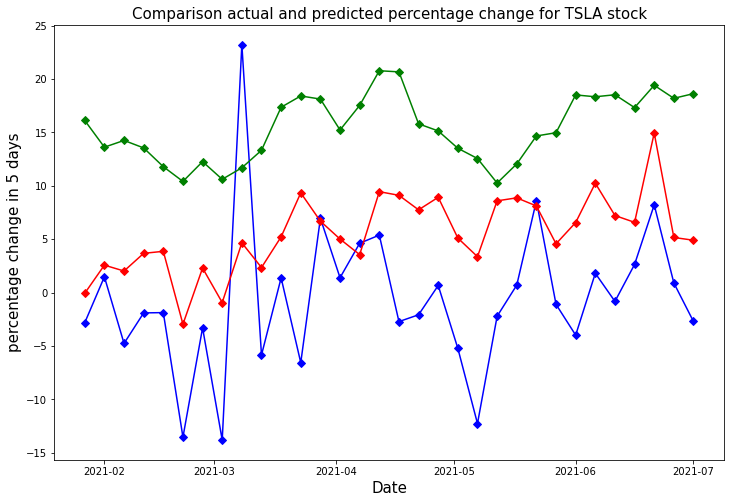

In [56]:
fig, axs = plt.subplots(1,1, figsize=(12,8))

axs.plot( (np.exp(s['TSLA_AdjClose_pred'])-1)*100, label = "actual value", color = 'blue', marker='D')
axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "LR predicted value", color = 'red', marker='D')
axs.plot( (np.exp(s['LSTM_predicted'])-1)*100, label = "LSTM predicted value", color = 'green', marker='D')

axs.set( 
       xlabel='Date', 
       ylabel='percentage change in 5 days',
       title=f'Comparison actual and predicted percentage change for {tickers[0]} stock')
axs.xaxis.label.set_size(15)
axs.yaxis.label.set_size(15)
axs.yaxis.label.set_size(15)

axs.title.set_size(15)

# LSTM with hyperparameter tuning


In [57]:
def buildmodel(layer, densenumber, denselayersize, optimizer, dropoutrate):

    layer1 = tf.keras.layers.Input(shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])) #seq length, input size
    # layer2 = tf.keras.layers.Embedding(input_dim=6,output_dim=64,input_length= 15000)(layer1)
    layerX = tf.keras.layers.LSTM(50, activation = 'relu') (layer1)
    for f in range(densenumber):
        layer6 = tf.keras.layers.Dense(denselayersize,activation="relu")(layerX)
        layer7 = tf.keras.layers.Dropout(dropoutrate)(layer6)
        layerX = tf.keras.layers.BatchNormalization()(layer7)
    output = tf.keras.layers.Dense(1, activation="linear" )(layerX)
    model = tf.keras.Model(inputs=layer1,outputs=output)
    model.compile(loss=["MSE"],optimizer=optimizer) 
    return model

In [58]:
dictionary =  dict(layer1= [ "LSTM"], 
                  densenumber = [2, 4, 6, 8],
                  denselayersize = [8, 16, 32, 64],
                  optimizer =["adam", "rmsprop", "SGD"],
                  dropoutrate = [0.2, 0.4, 0.8]
                  )

In [59]:
iterate = 0
model_dict = {}
for layer in dictionary["layer1"]:
    for densenumber in dictionary["densenumber"]:
        for denselayersize in dictionary["denselayersize"]:
            for optimizer in dictionary["optimizer"]:
                for dropoutrate in dictionary["dropoutrate"]:
                    tf.keras.backend.clear_session()
                    tf.random.set_seed(1)

                    model= buildmodel(layer, densenumber, denselayersize, optimizer, dropoutrate)
                    
                    model_history = model.fit(X_train_LSTM, Y_train_LSTM, #validation_data=(X_test_LSTM, Y_test_LSTM)
                                            validation_split = 0.5,epochs=80, batch_size=72, verbose=0, shuffle=False)
                    predictions=model.predict(X_test_LSTM)
                    # y_val = Y_test_LSTM
                    # predictions2 = pd.DataFrame(predictions)                        
                    
                    # Y_3 = pd.DataFrame(y_val)
                    # correlation = pd.concat([Y_3, predictions2], axis=1).corr('spearman').iloc[0,1]

                    hist = model_history.history
                    error_Training_LSTM = mean_squared_error(Y_train_LSTM, model.predict(X_train_LSTM))
                    predicted = model.predict(X_test_LSTM)
                    error_Test_LSTM = mean_squared_error(Y_test, predicted)
                    
                    # test_loss = model.evaluate(car_test_features_norm[features], car_test_labels, verbose=0)
                    test_rmse = np.sqrt(error_Test_LSTM)
                    
                    model_dict[iterate]= dict(layer= layer, densenumber = densenumber, denselayersize=denselayersize, optimizer= optimizer,dropoutrate= dropoutrate, 
                    predictions = predictions, history = hist, MSE_Training = error_Training_LSTM, MSE_Test = error_Test_LSTM, RMSE_Test = test_rmse
                    )
                    iterate += 1    

                    
                   
              
        

1/1 [==============================] - 0s 169ms/step


1/1 [==============================] - 0s 12ms/step


In [60]:
model_pd = pd.DataFrame(model_dict).transpose().sort_values(by="MSE_Test")

In [61]:
model_pd.sort_values(by="MSE_Test")

layer densenumber denselayersize optimizer dropoutrate  \
103  LSTM           6             64   rmsprop         0.4   
108  LSTM           8              8      adam         0.2   
33   LSTM           2             64       SGD         0.2   
15   LSTM           2             16       SGD         0.2   
82   LSTM           6             16      adam         0.4   
..    ...         ...            ...       ...         ...   
11   LSTM           2             16      adam         0.8   
36   LSTM           4              8      adam         0.2   
39   LSTM           4              8   rmsprop         0.2   
18   LSTM           2             32      adam         0.2   
4    LSTM           2              8   rmsprop         0.4   

                                           predictions  \
103  [[-0.020961879], [-0.020478673], [-0.019623067...   
108  [[-0.014497378], [-0.015208864], [-0.014035397...   
33   [[-0.008687343], [-0.008856516], [-0.010669776...   
15   [[-0.024861803], [-0.019955633], [-0.018641276...   
82   [[-0.004796223], [-0.0034909556], [-0.00062818...   
..                                                 ...   
11   [[0.17985243], [0.25231227], [0.20543736], [0....   
36   [[-0.33232623], [-0.21451154], [-0.26912692], ...   
39   [[0.38653812], [0.4078099], [0.41093588], [0.4...   
18   [[-0.6488172], [-0.78424644], [-0.72882736], [...   
4    [[-1.345989], [-1.4694741], [-1.2486391], [-1....   

                                               history MSE_Training  MSE_Test  \
103  {'loss': [1.6516029834747314, 1.33210170269012...     0.004293   0.00445   
108  {'loss': [1.5694092512130737, 1.71935427188873...     0.007285  0.004496   
33   {'loss': [1.5866899490356445, 1.08021855354309...     0.004296  0.004504   
15   {'loss': [1.285689353942871, 0.769395947456359...     0.004519  0.004554   
82   {'loss': [1.9103010892868042, 2.01128387451171...     0.005033  0.004558   
..                                                 ...          ...       ...   
11   {'loss': [1.7877188920974731, 1.61406672000885...     0.025127  0.049411   
36   {'loss': [2.9114816188812256, 2.60207390785217...     0.026724  0.057852   
39   {'loss': [2.861738443374634, 2.284807443618774...     0.026002  0.161133   
18   {'loss': [1.5711188316345215, 1.29191172122955...     0.039584  0.470515   
4    {'loss': [1.3102954626083374, 1.07818686962127...     0.075781  1.240434   

    RMSE_Test  
103  0.066707  
108  0.067049  
33   0.067114  
15    0.06748  
82   0.067513  
..        ...  
11   0.222286  
36   0.240524  
39   0.401414  
18   0.685941  
4    1.113748  

[144 rows x 10 columns]

In [62]:
best_model_predictions = model_pd.iloc[37]['predictions']
best_model_predictions

array([[0.0050138 ],
       [0.00501372],
       [0.00501347],
       [0.00501277],
       [0.00501172],
       [0.00501083],
       [0.00501152],
       [0.00501099],
       [0.00501045],
       [0.00501256],
       [0.00501378],
       [0.00501372],
       [0.0050128 ],
       [0.00501312],
       [0.00501389],
       [0.00501466],
       [0.00501435],
       [0.00501377],
       [0.00501311],
       [0.00501327],
       [0.00501257],
       [0.00500934],
       [0.00500988],
       [0.00501245],
       [0.00501382],
       [0.00501475],
       [0.00501453],
       [0.00501401],
       [0.00501383],
       [0.00501423],
       [0.00501463],
       [0.00501442]], dtype=float32)

In [63]:
# model_pd.to_csv('lstm_hyperparameter_tuning.csv')

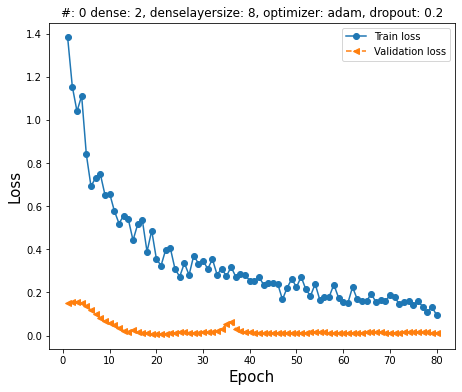

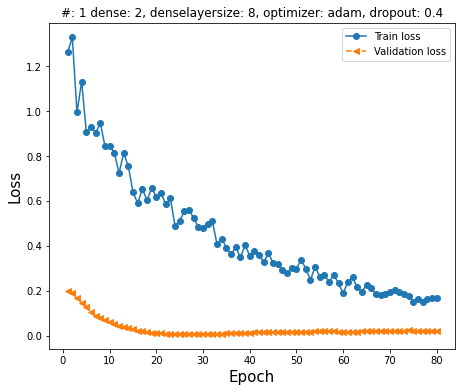

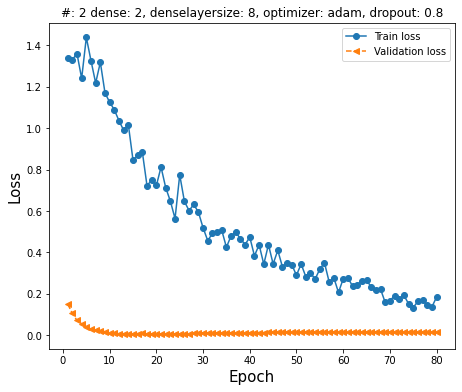

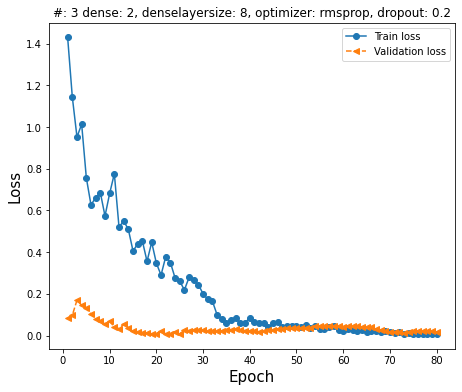

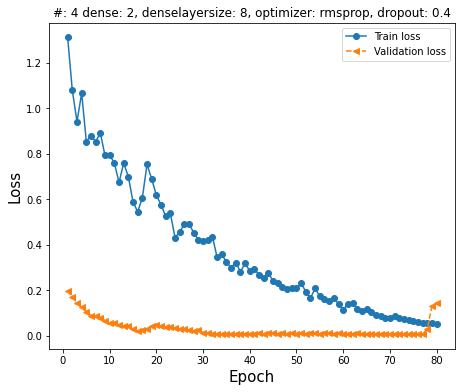

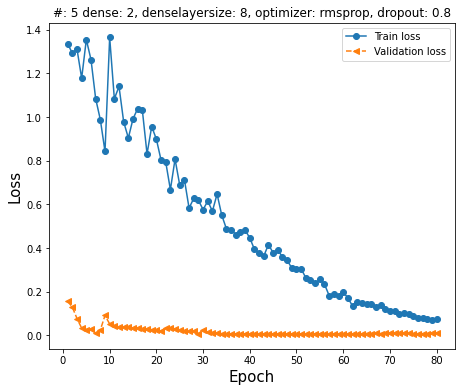

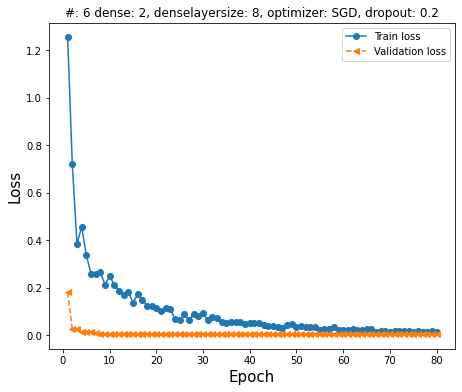

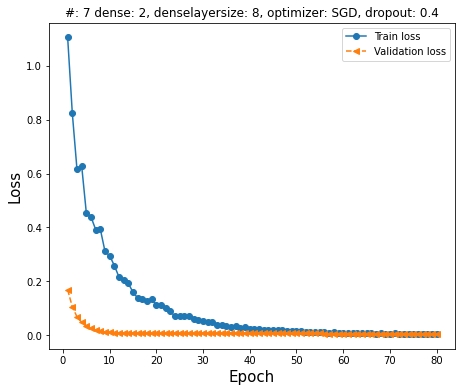

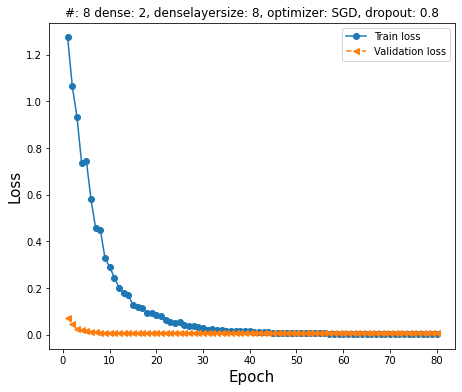

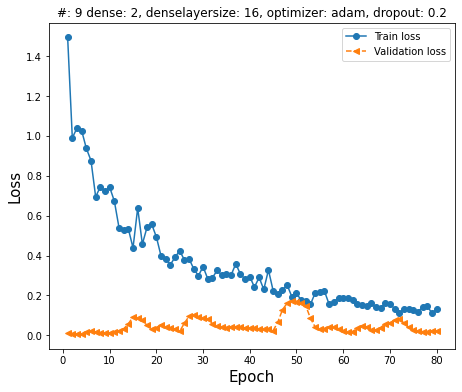

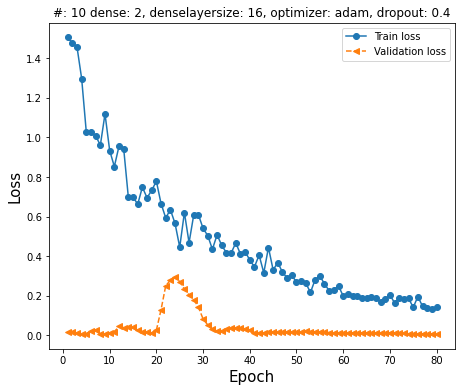

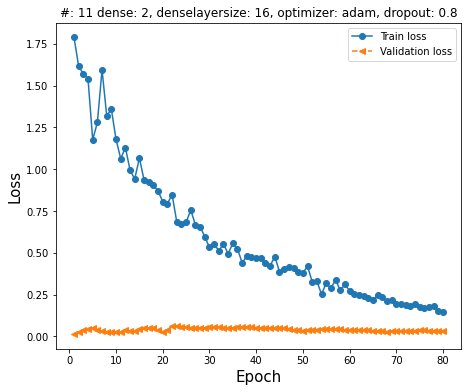

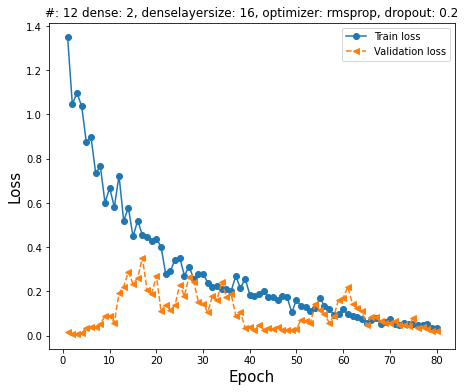

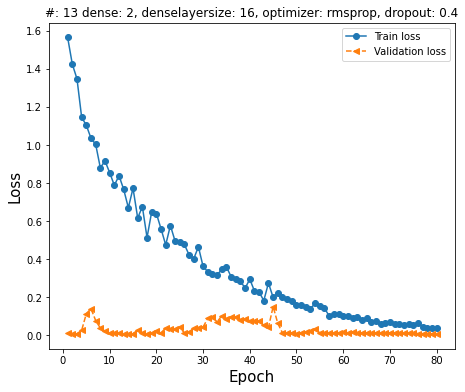

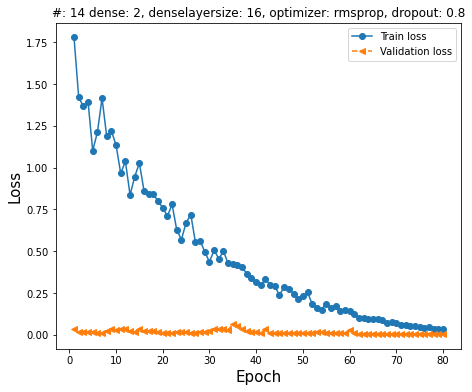

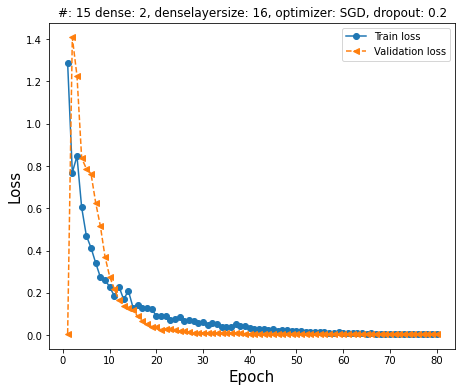

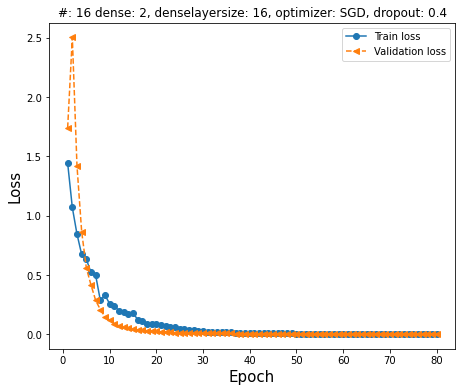

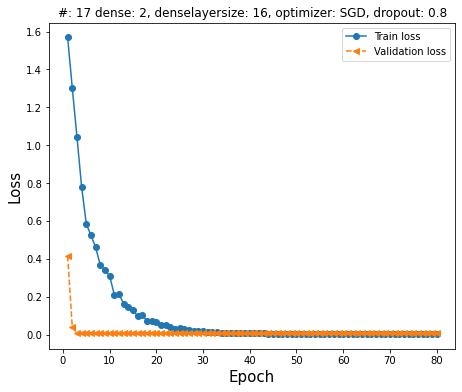

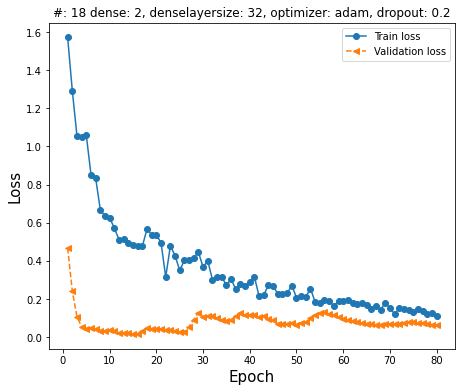

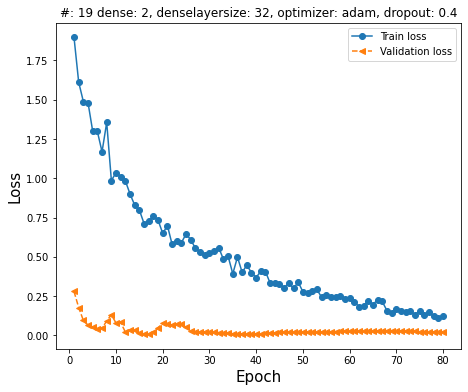

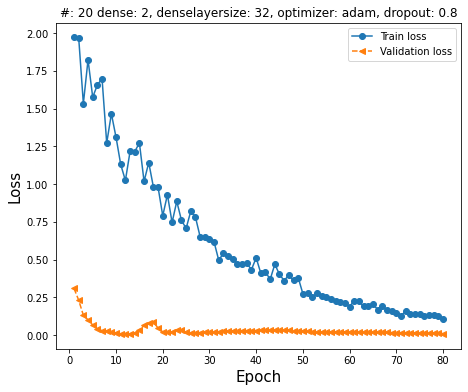

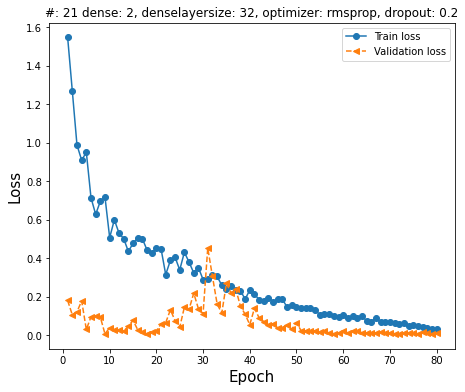

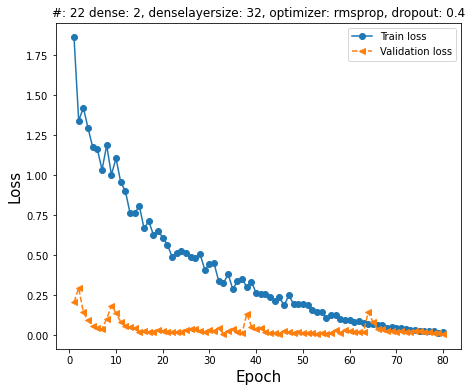

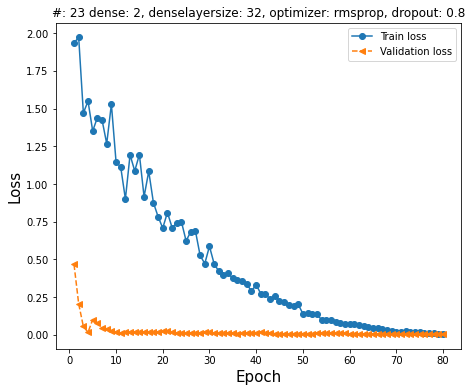

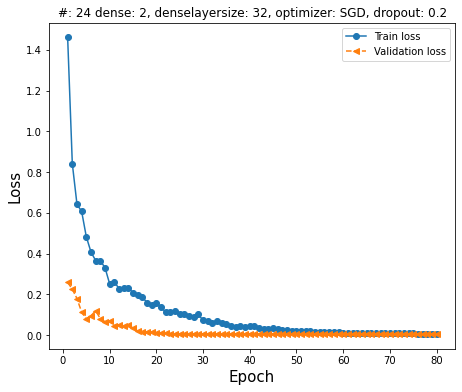

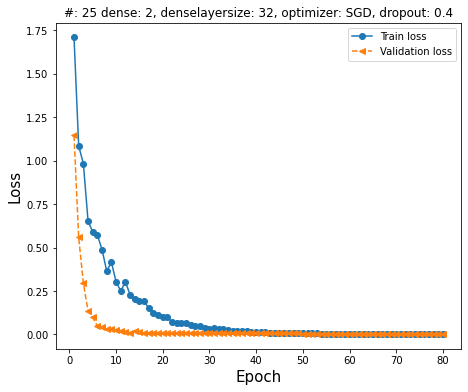

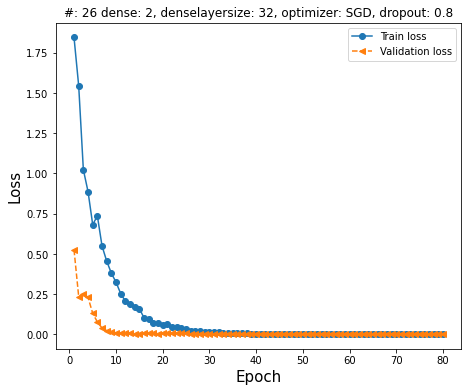

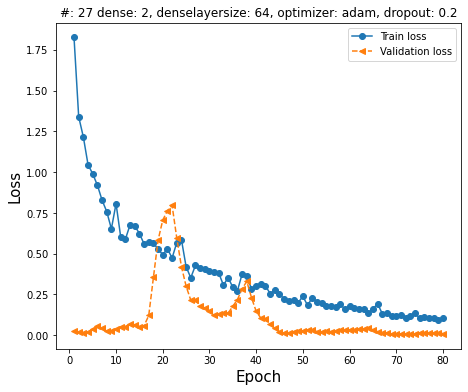

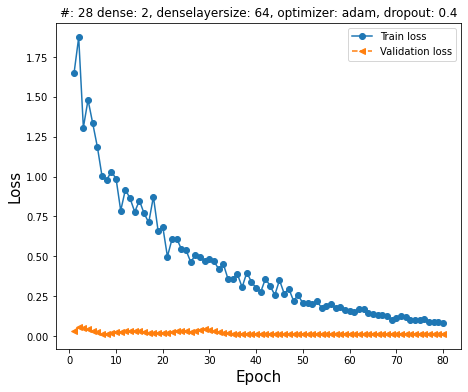

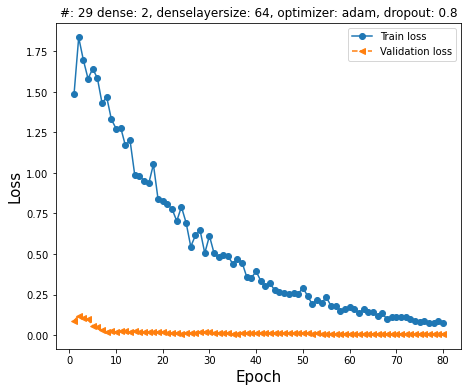

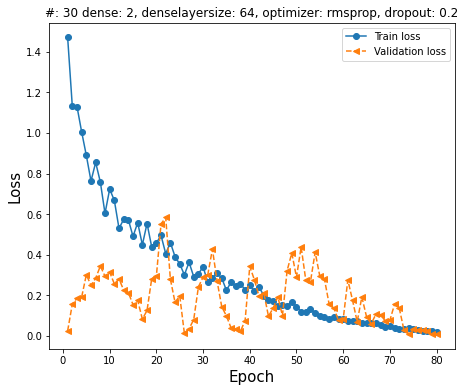

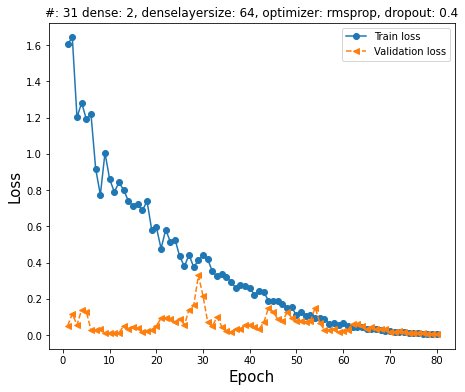

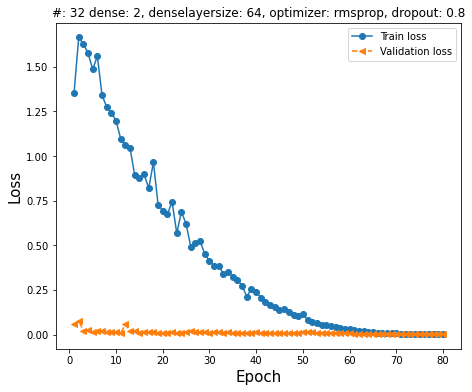

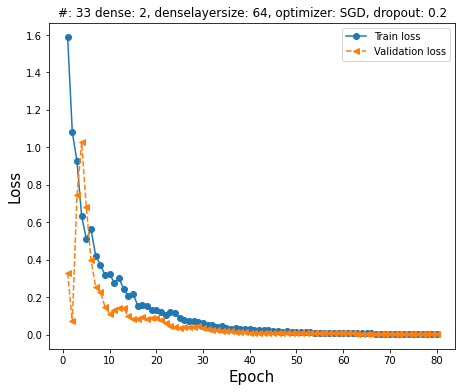

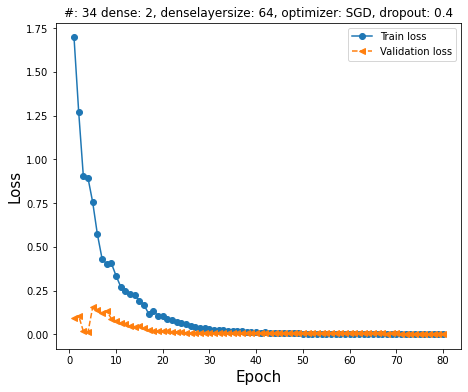

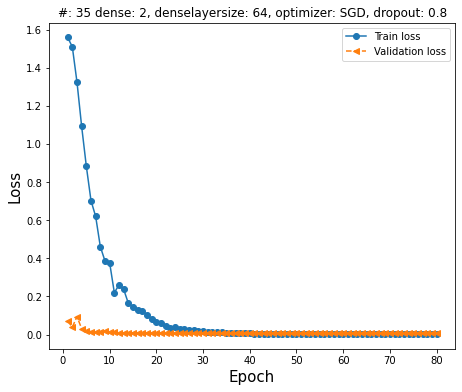

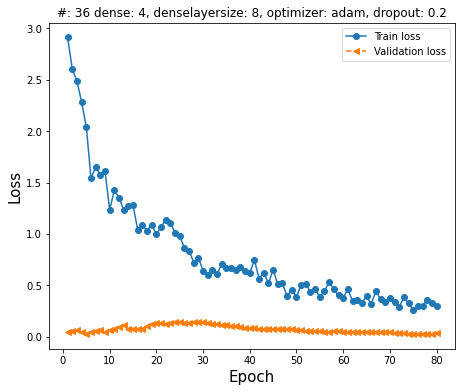

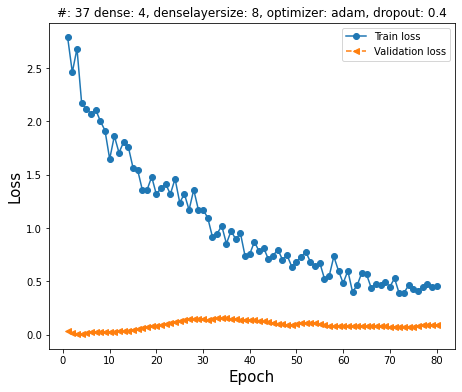

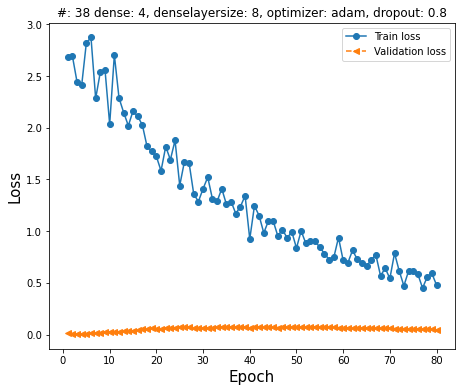

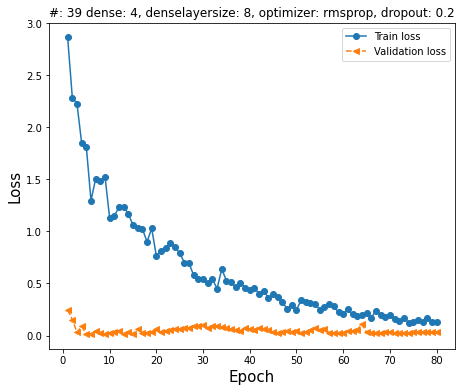

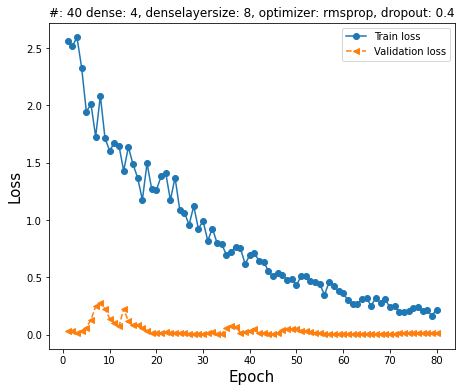

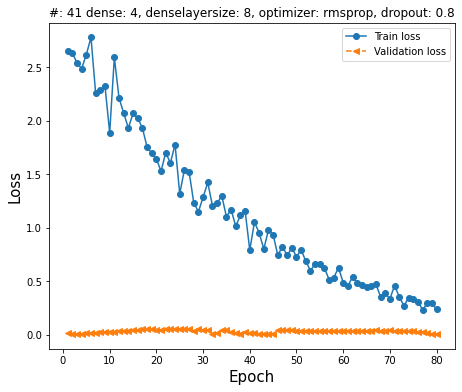

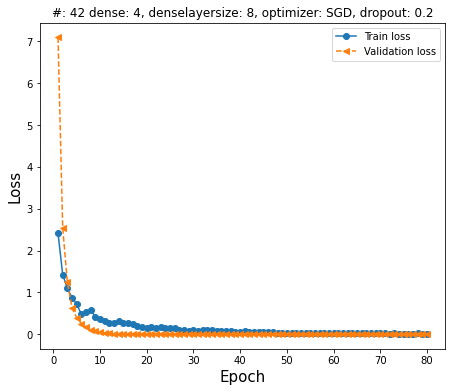

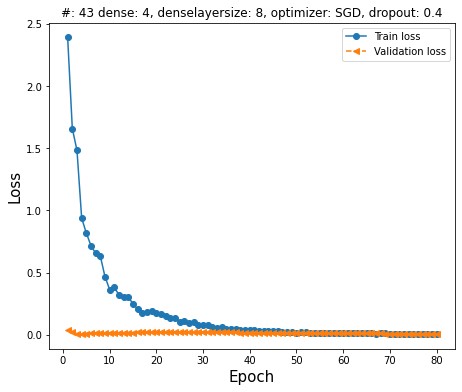

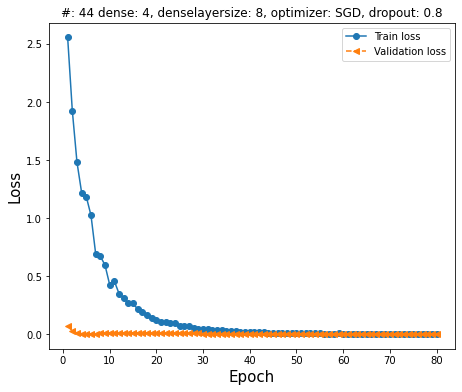

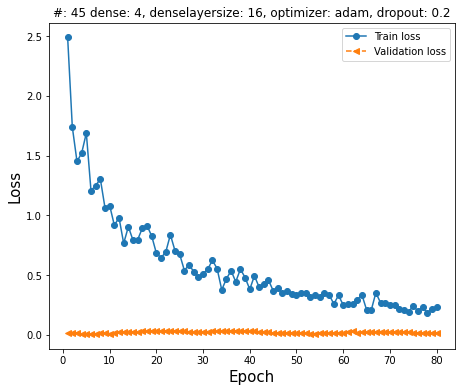

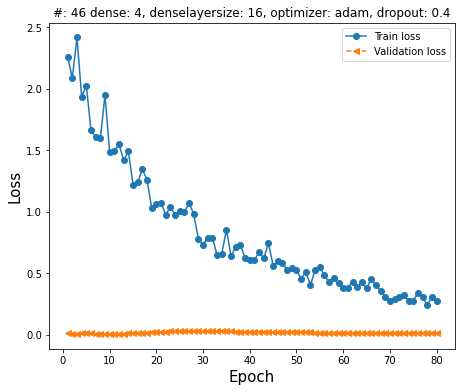

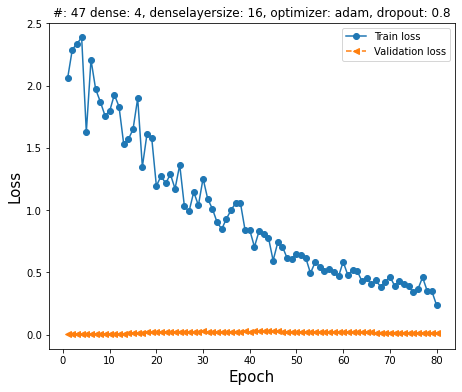

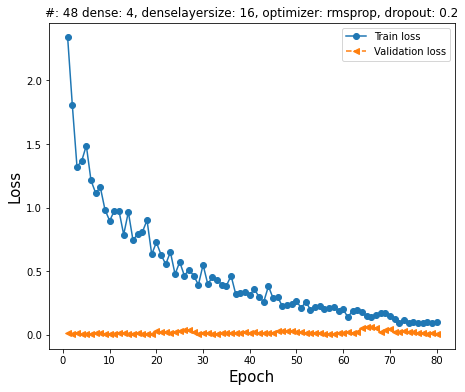

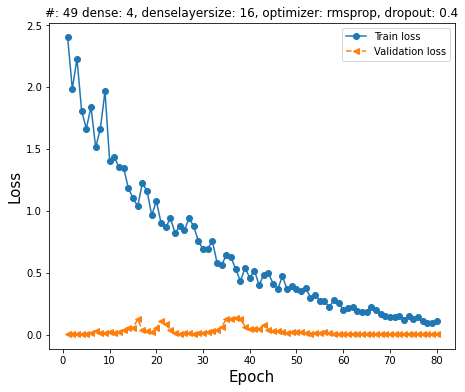

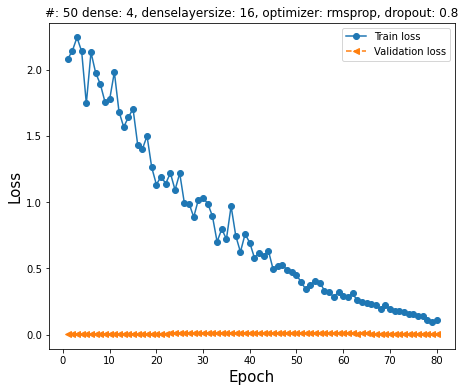

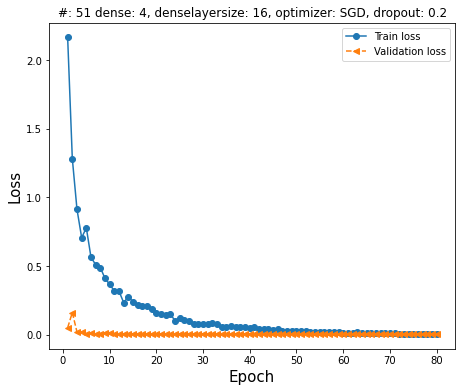

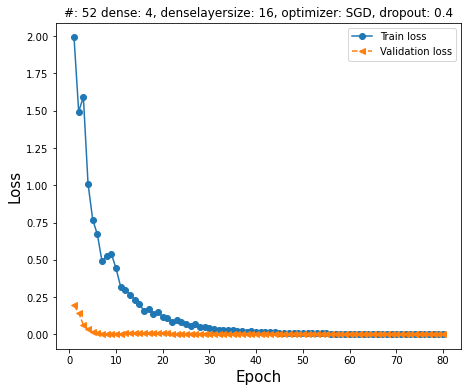

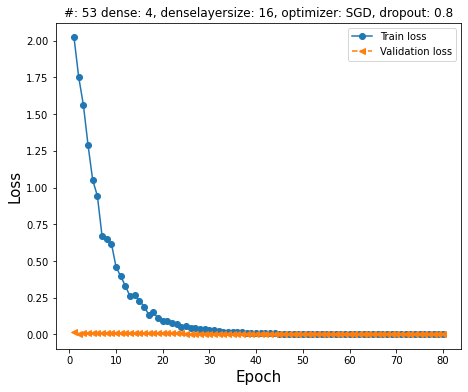

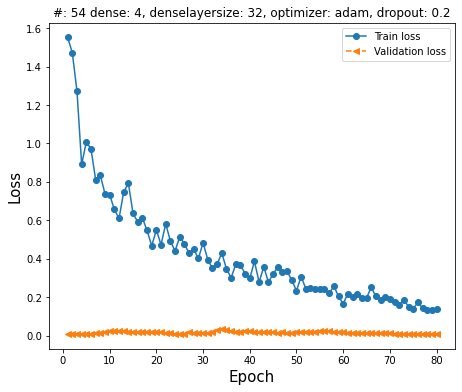

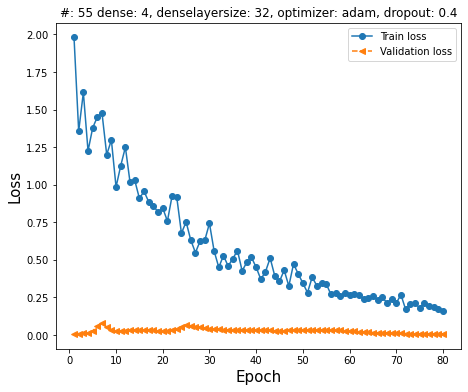

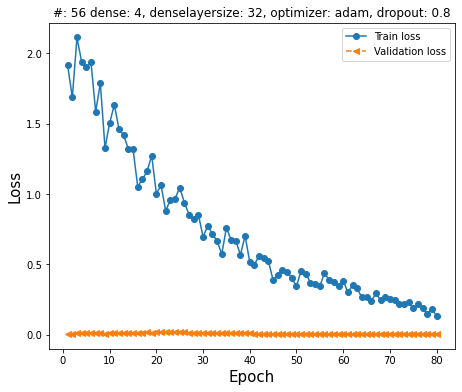

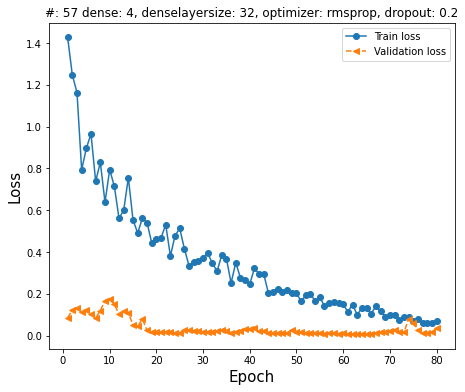

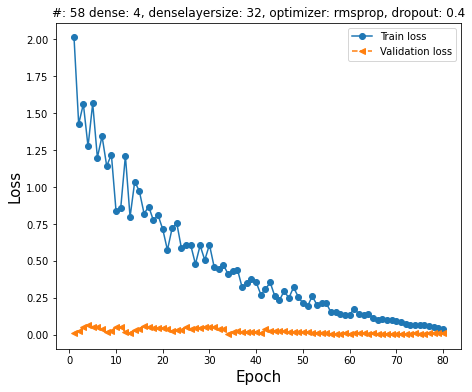

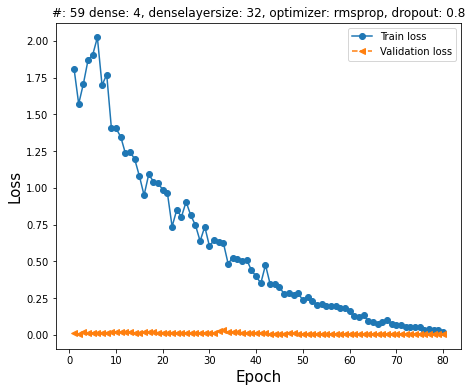

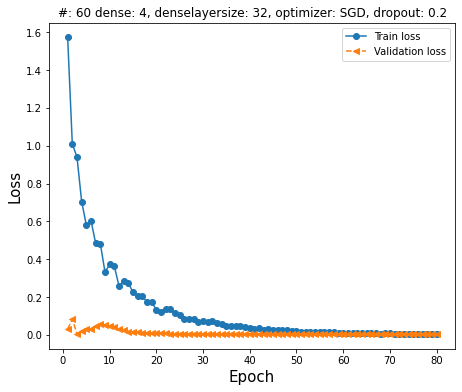

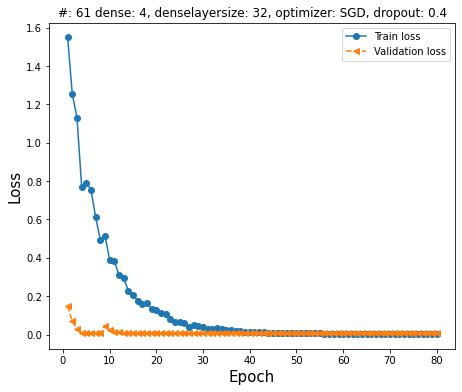

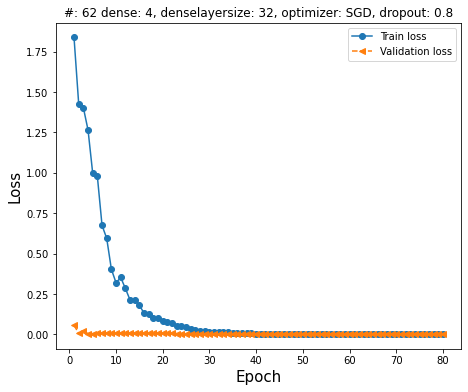

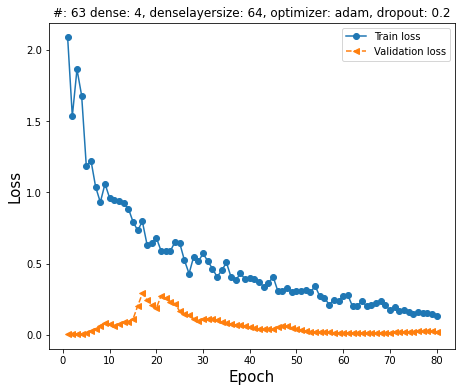

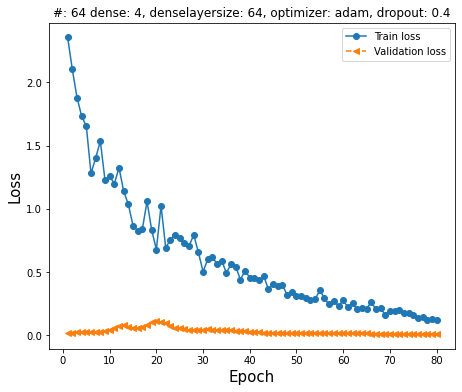

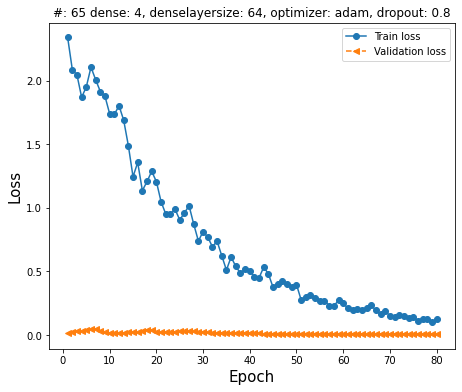

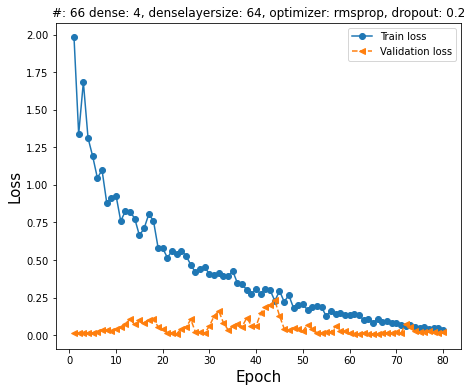

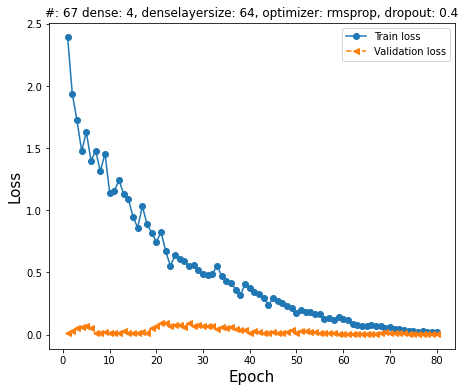

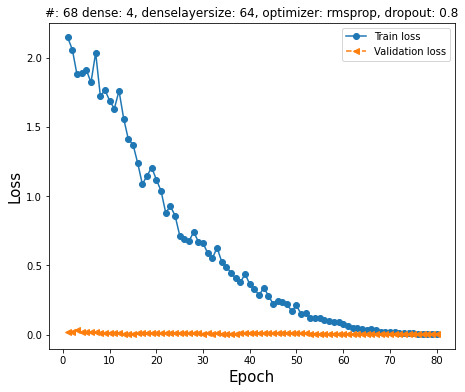

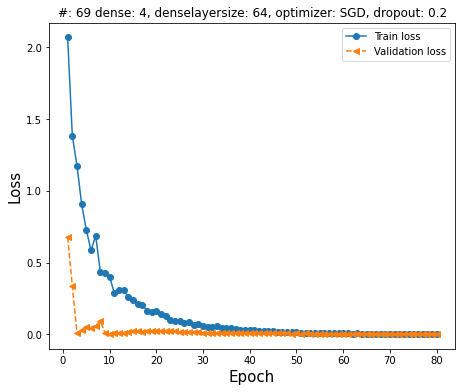

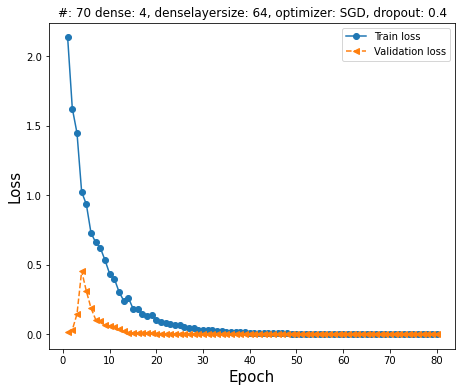

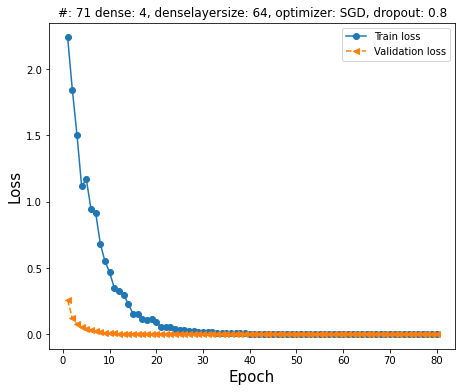

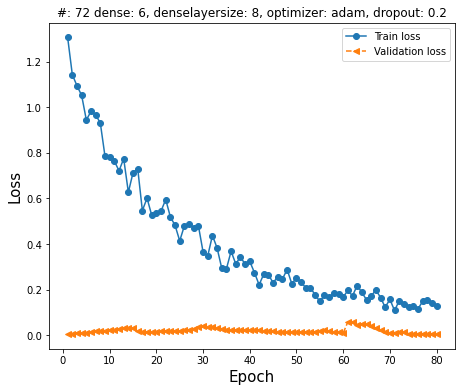

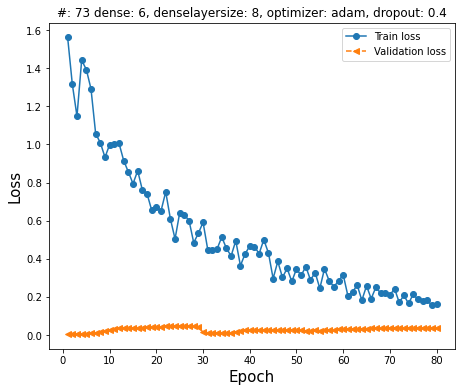

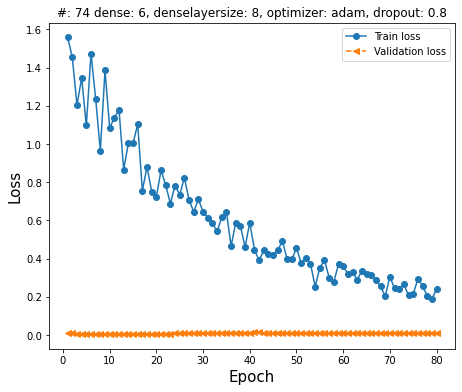

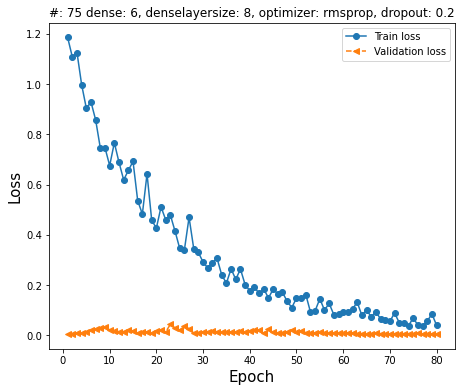

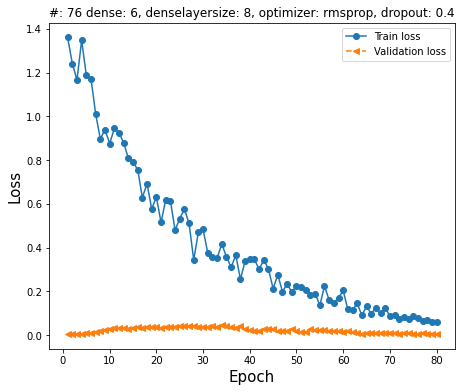

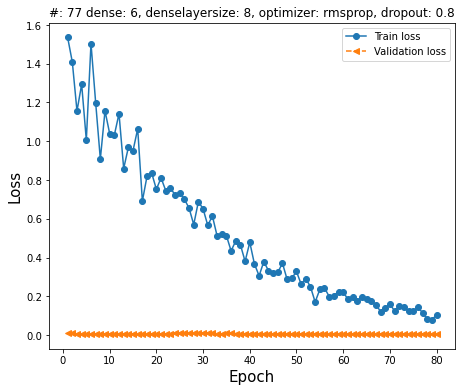

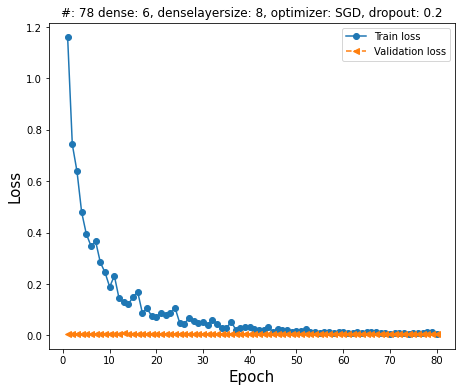

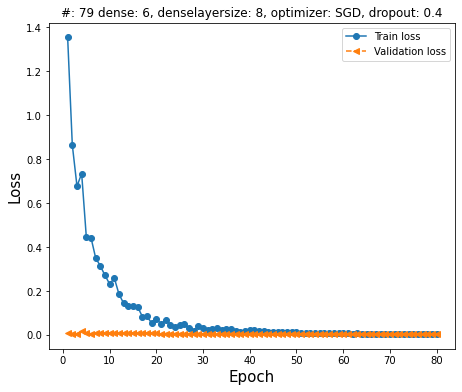

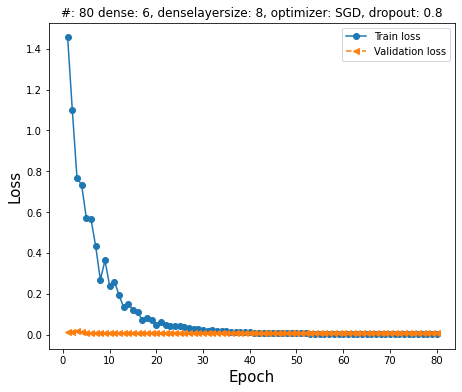

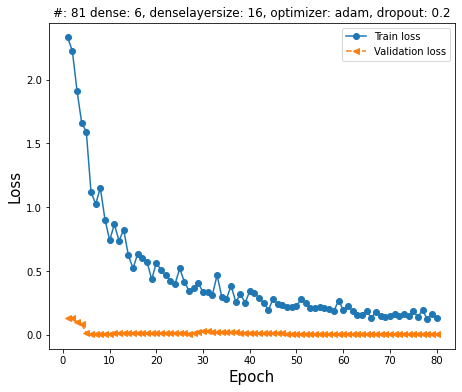

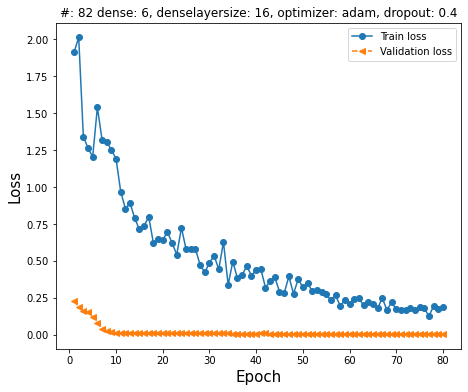

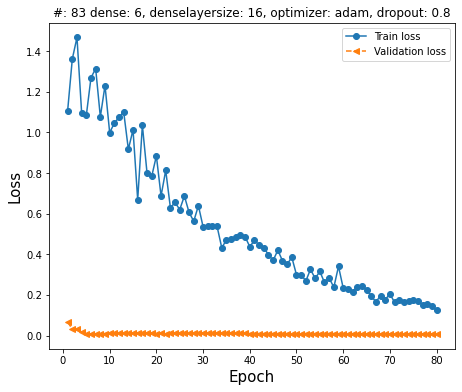

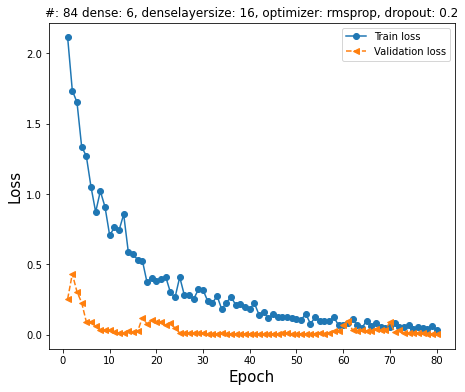

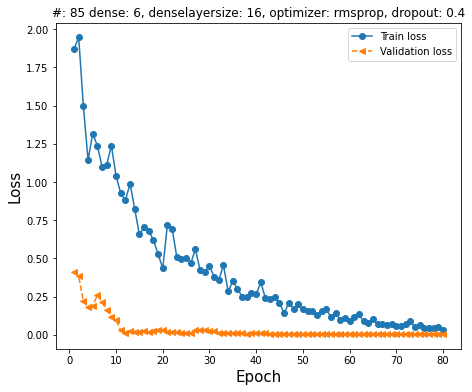

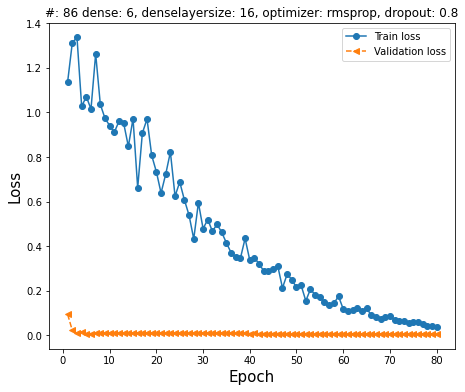

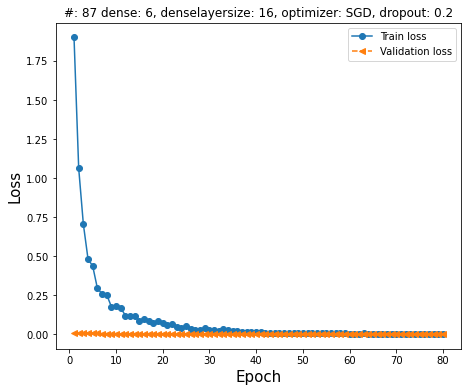

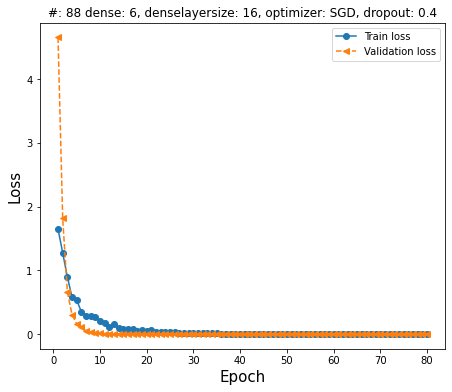

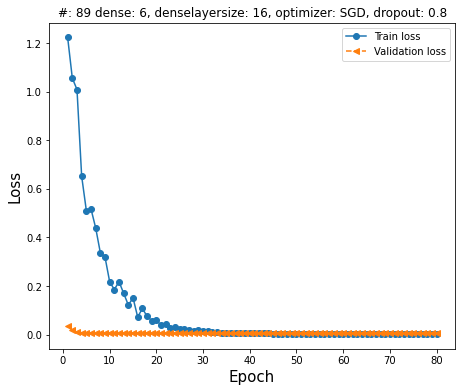

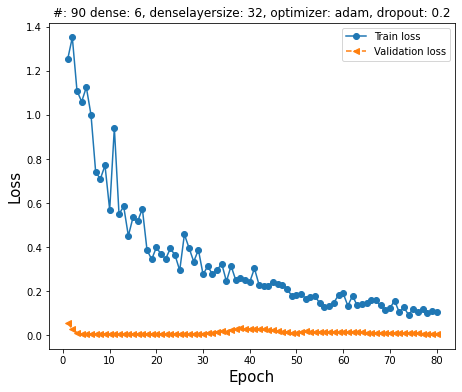

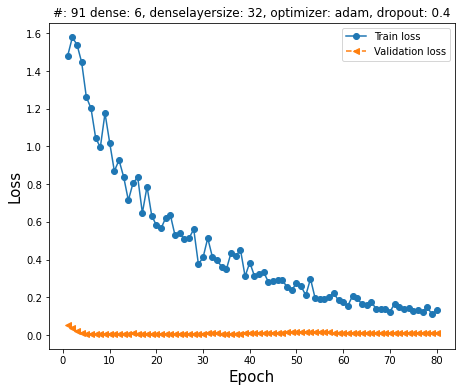

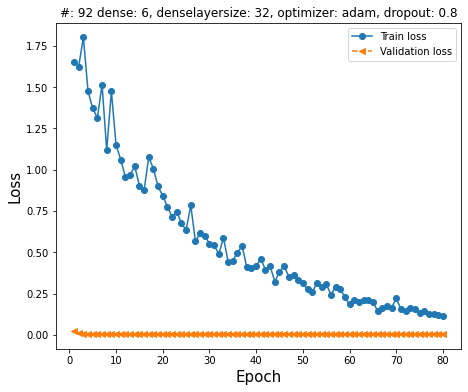

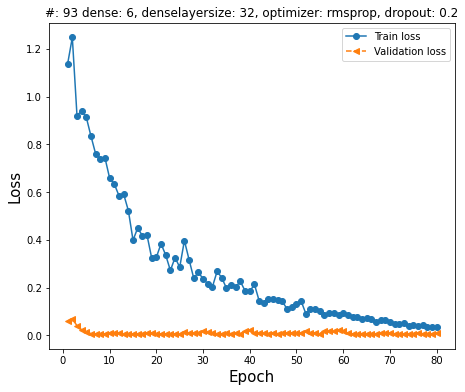

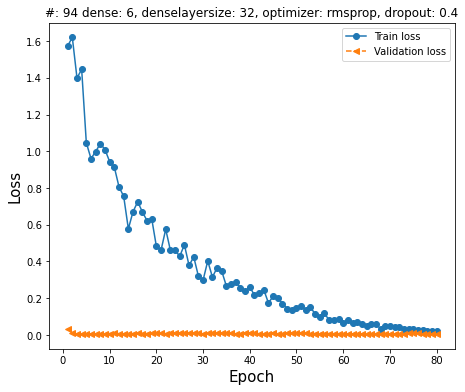

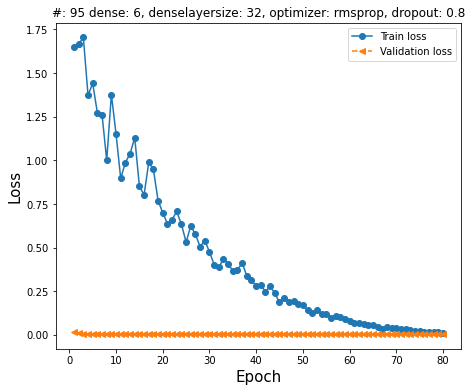

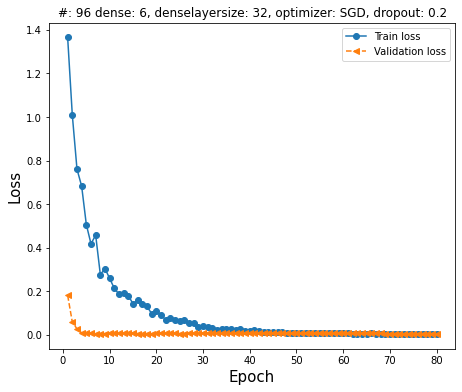

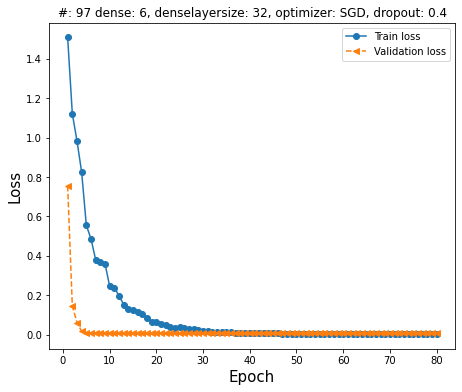

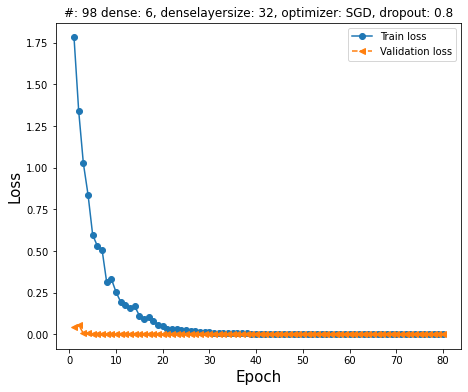

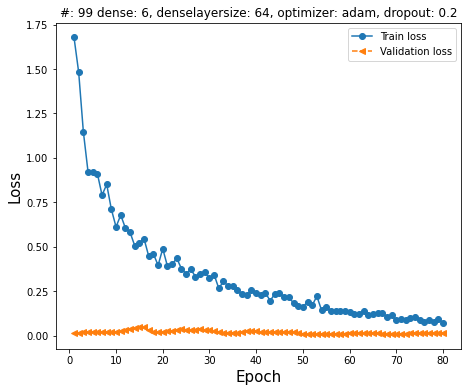

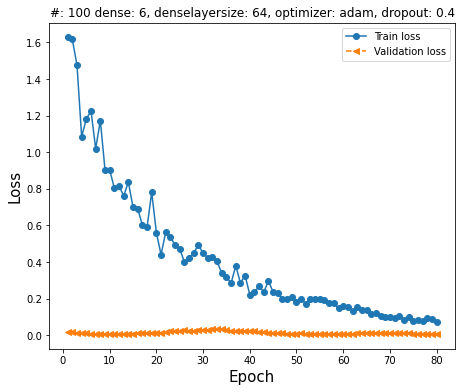

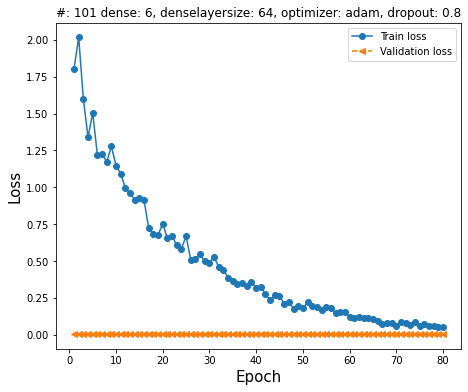

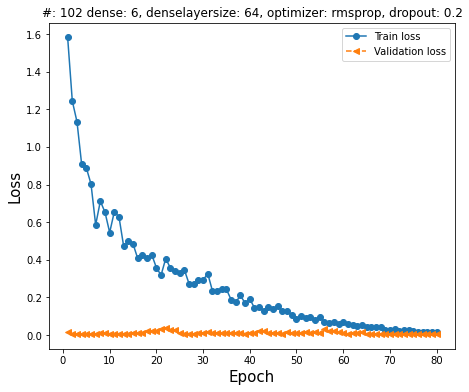

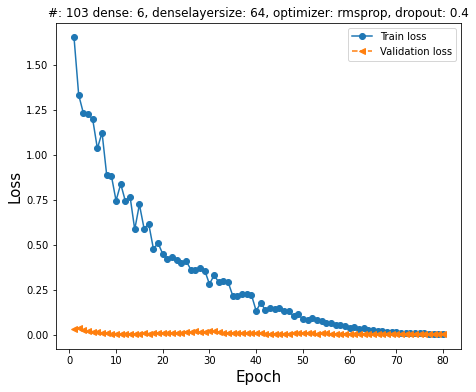

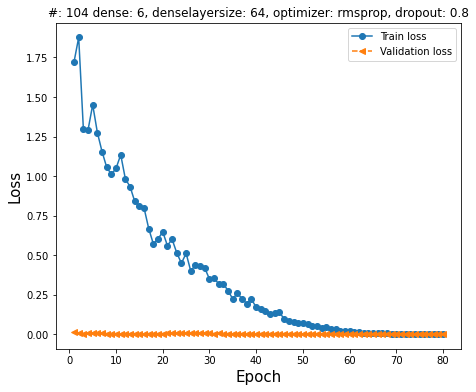

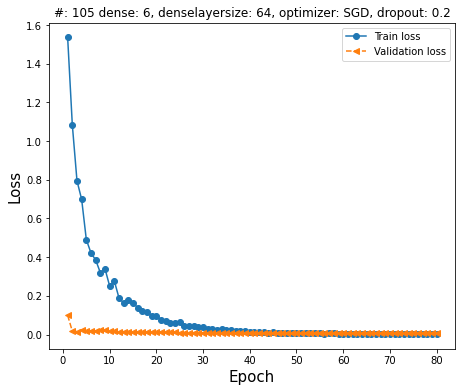

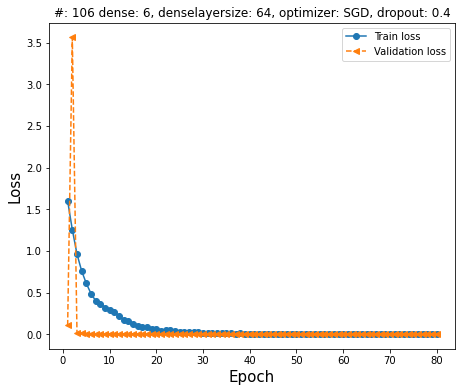

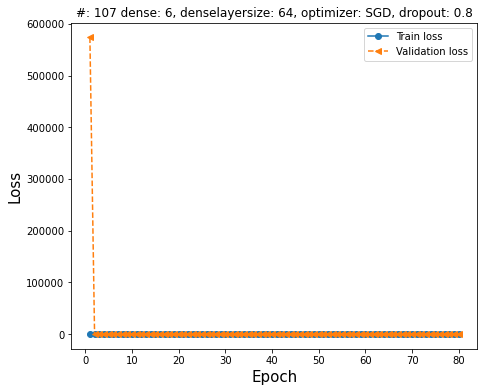

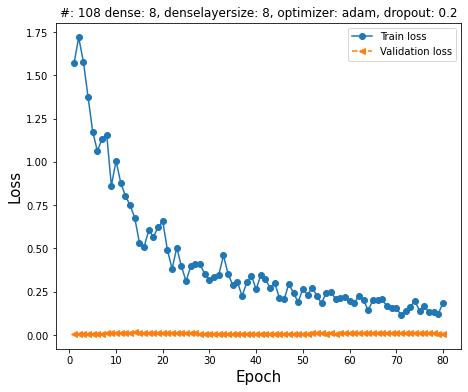

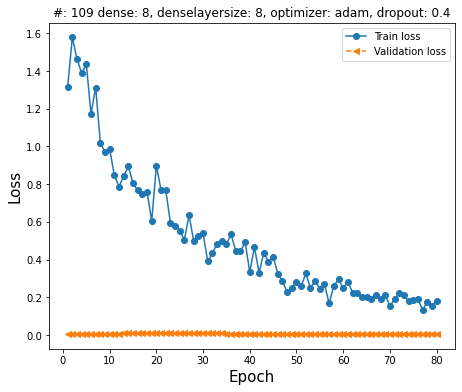

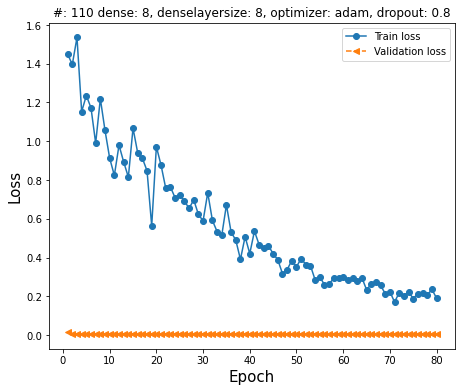

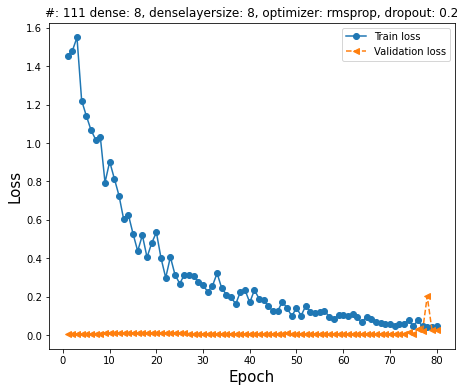

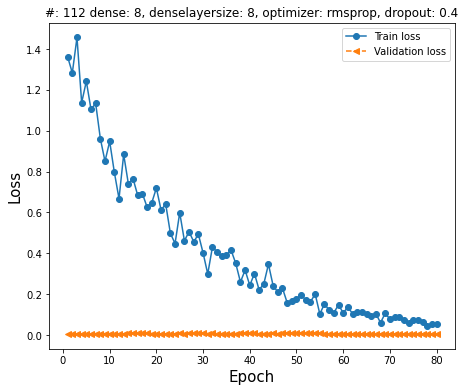

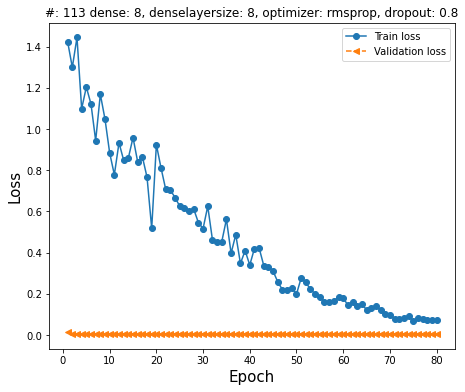

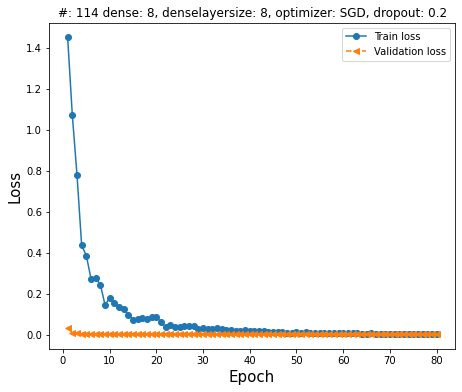

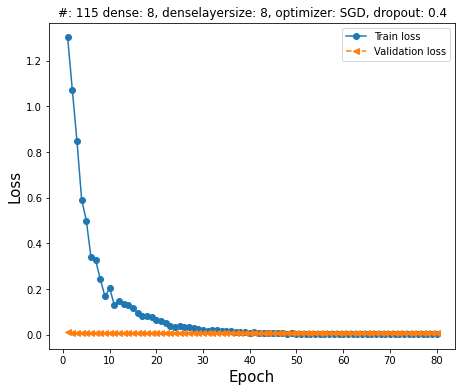

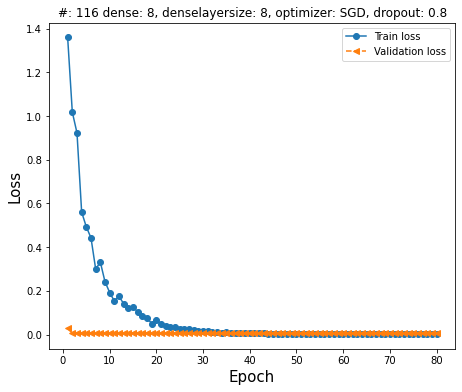

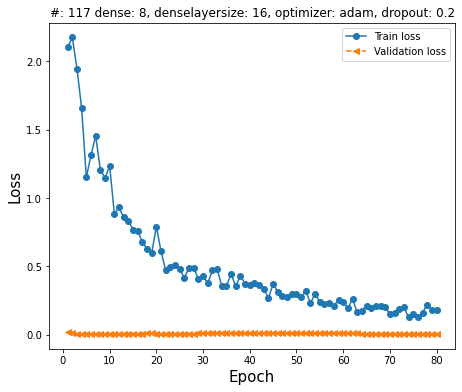

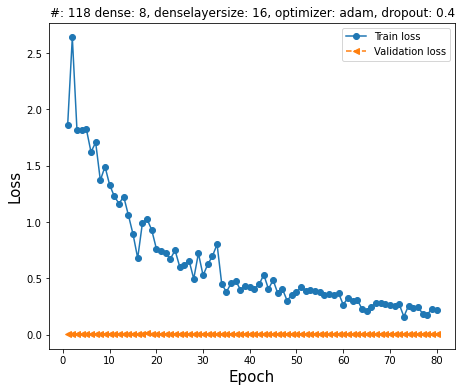

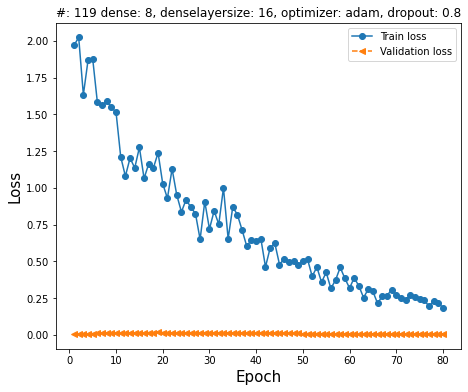

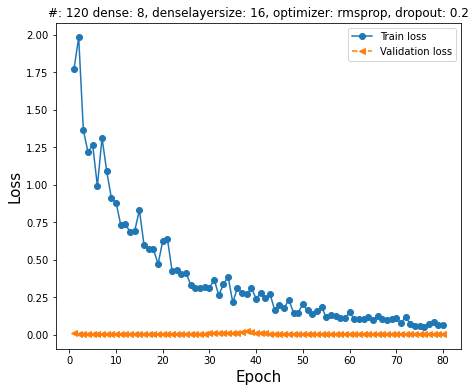

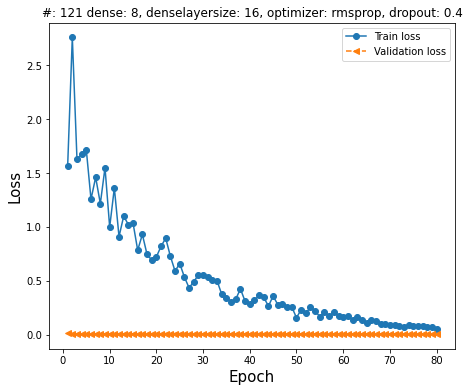

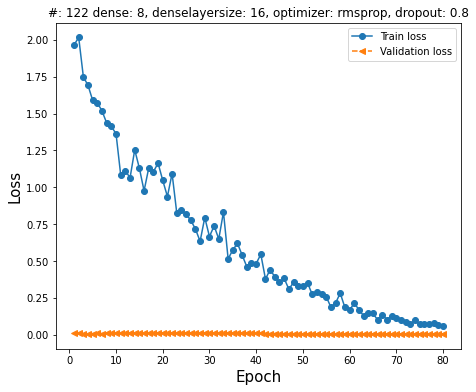

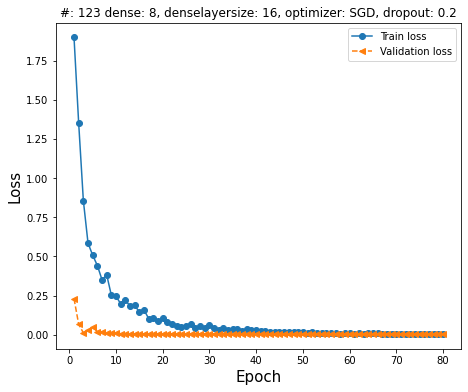

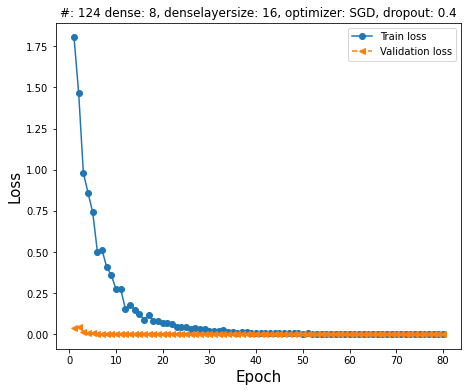

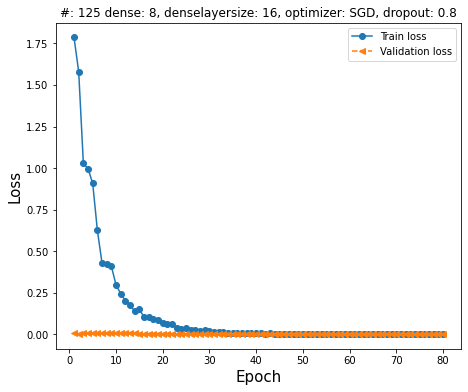

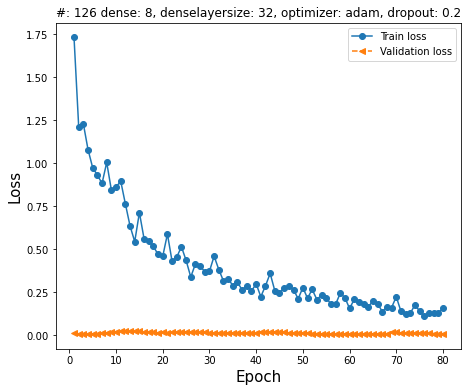

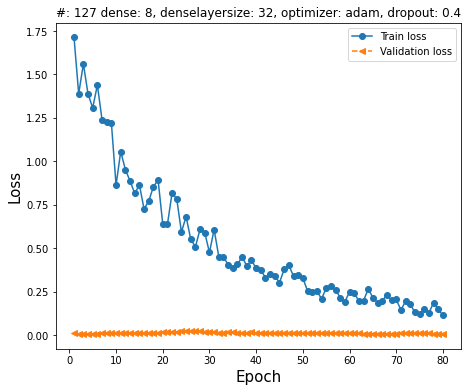

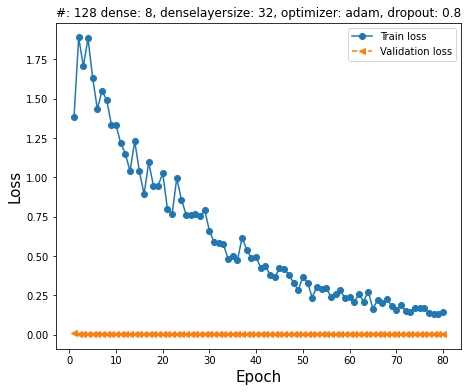

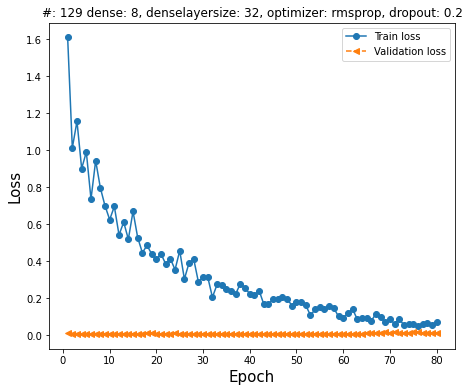

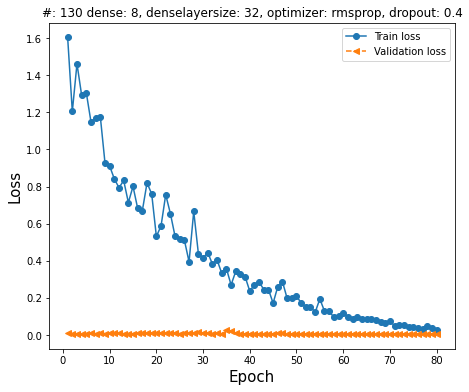

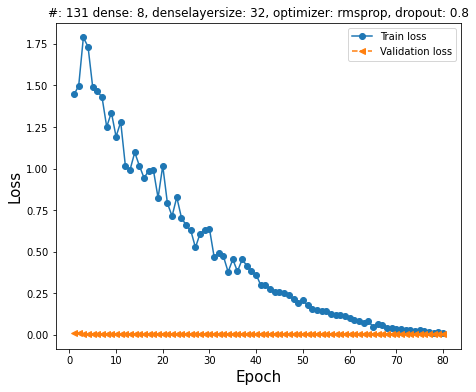

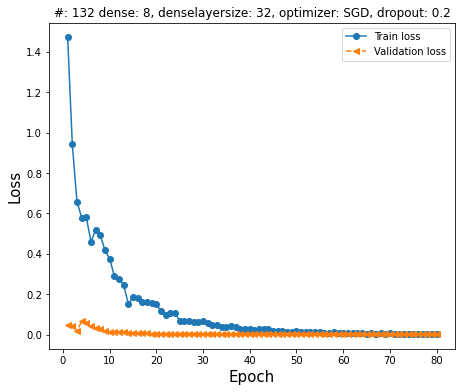

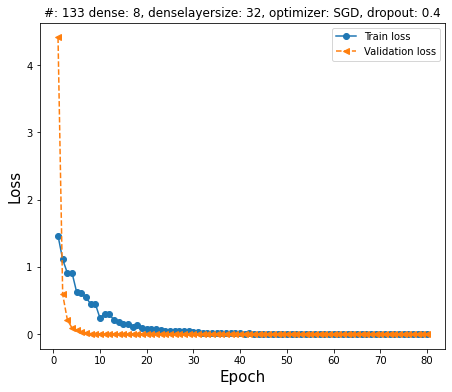

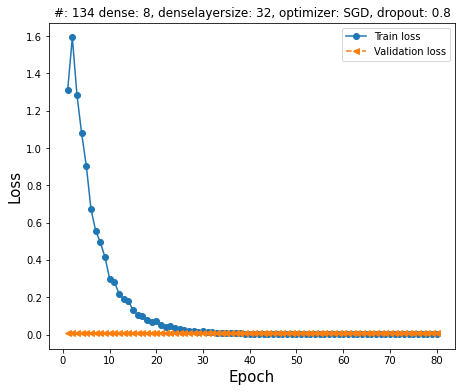

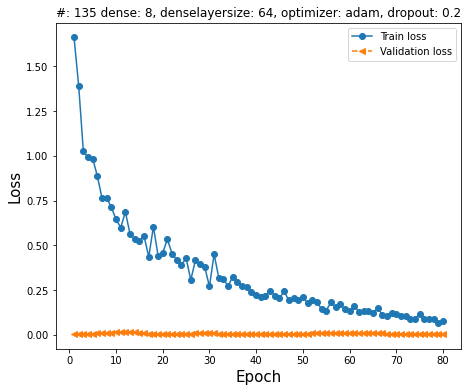

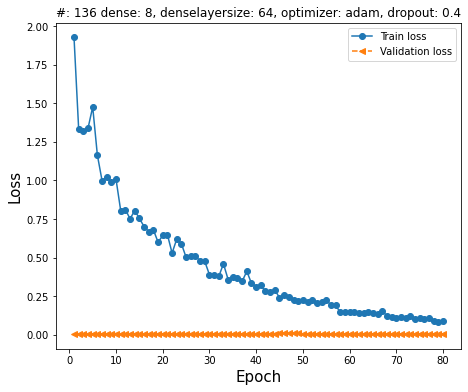

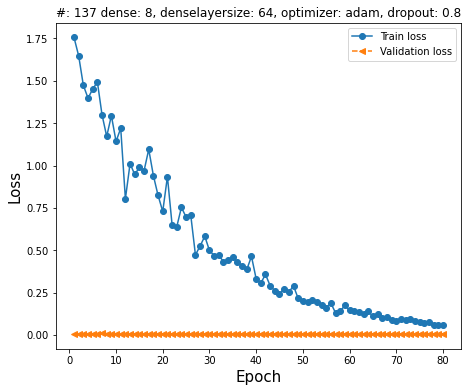

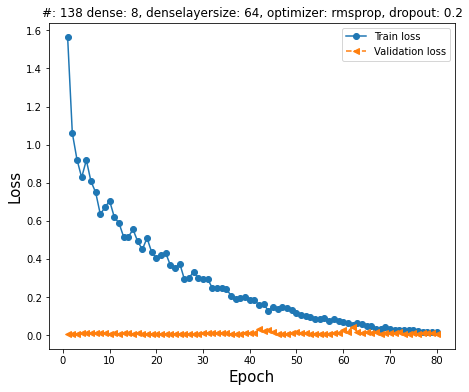

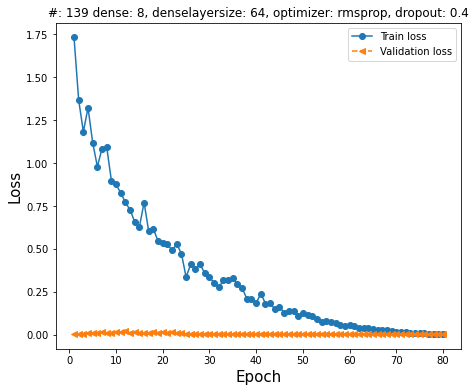

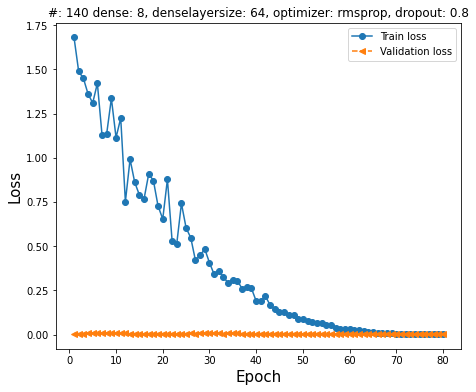

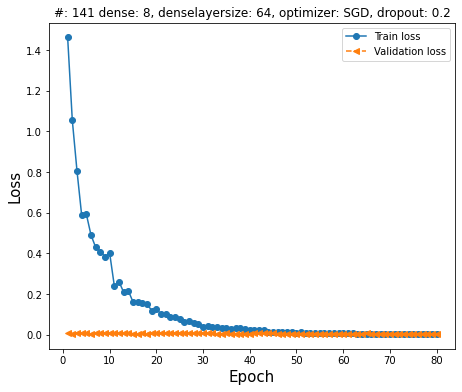

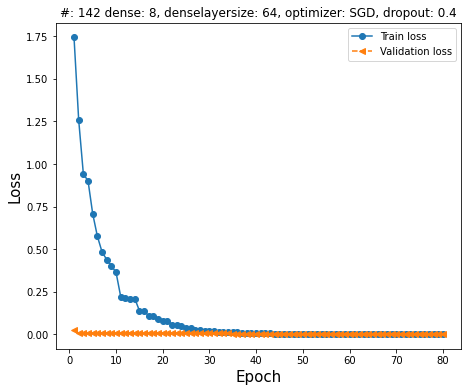

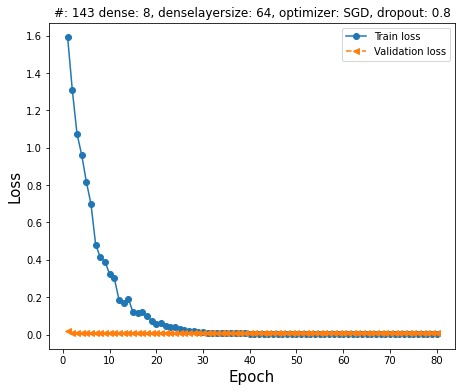

In [64]:
for count, model in enumerate(model_dict): # should be model_dict
    x_arr = np.arange(len(model_dict[model]['history']['loss'])) + 1

    fig = plt.figure(figsize=(16, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, model_dict[model]['history']['loss'], '-o', label='Train loss')
    ax.plot(x_arr, model_dict[model]['history']['val_loss'], '--<', label='Validation loss')
    ax.set_title(label= (f"#: {count} dense: {model_dict[model]['densenumber']}, denselayersize: {model_dict[model]['denselayersize']}, optimizer: {model_dict[model]['optimizer']}, dropout: {model_dict[model]['dropoutrate']}"))
    ax.legend(fontsize=10)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)

    # plt.savefig(f'{model}.png')

    # ax = fig.add_subplot(1, 2, 2)
    # ax.plot(x_arr, model['history']['MSE_Training'], '-o', label='Train acc.')
    # ax.plot(x_arr, model['history']['MSE_Test'], '--<', label='Validation acc.')
    # ax.legend(fontsize=15)
    # ax.set_xlabel('Epoch', size=15)
    # ax.set_ylabel('Accuracy', size=15)
    # plt.show()


# Use Parameters from Tuning

In [65]:
tf.keras.backend.clear_session()
tf.random.set_seed(1)
LSTM_tuned = buildmodel(layer=[ "LSTM"], densenumber=4, denselayersize=64, optimizer='rmsprop', dropoutrate=0.4)

In [66]:
model_history_tuned = LSTM_tuned.fit(X_train_LSTM, Y_train_LSTM, #validation_data=(X_test_LSTM, Y_test_LSTM)
                                            validation_split = 0.5,epochs=80, batch_size=72, verbose=0, shuffle=False)
predictions_tuned = LSTM_tuned.predict(X_test_LSTM)
# y_val = Y_test_LSTM
# predictions2 = pd.DataFrame(predictions)                        

# Y_3 = pd.DataFrame(y_val)
# correlation = pd.concat([Y_3, predictions2], axis=1).corr('spearman').iloc[0,1]

hist_LSTM_tuned = model_history_tuned.history
error_Training_LSTM_tuned = mean_squared_error(Y_train_LSTM, LSTM_tuned.predict(X_train_LSTM))
predicted_LSTM_tuned = LSTM_tuned.predict(X_test_LSTM)
error_Test_LSTM_tuned = mean_squared_error(Y_test, predicted)

# test_loss = model.evaluate(car_test_features_norm[features], car_test_labels, verbose=0)
test_rmse_LSTM_tuned= np.sqrt(error_Test_LSTM_tuned)

1/1 [==============================] - 0s 11ms/step


In [67]:
predictions_tuned

array([[0.07082898],
       [0.070235  ],
       [0.07282528],
       [0.07357026],
       [0.07284903],
       [0.06885827],
       [0.06667797],
       [0.06802818],
       [0.06617234],
       [0.0647267 ],
       [0.06275693],
       [0.06653688],
       [0.07072485],
       [0.06808547],
       [0.0673681 ],
       [0.06172796],
       [0.06616315],
       [0.06423522],
       [0.06521285],
       [0.06795751],
       [0.07711727],
       [0.07253148],
       [0.07185058],
       [0.07527509],
       [0.06409185],
       [0.05899458],
       [0.06225138],
       [0.06537399],
       [0.06842622],
       [0.06905202],
       [0.06695748],
       [0.06604359]], dtype=float32)

In [68]:
LSTM_tuned.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 26)]           0         
                                                                 
 lstm (LSTM)                 (None, 50)                15400     
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                             

In [69]:
s['LSTM_tuned_predicted'] = predictions_tuned
s

TSLA_AdjClose_pred  LM_predicted  LSTM_predicted  \
dt                                                             
2021-01-27           -0.028582     -0.000653        0.149480   
2021-02-01            0.014681      0.025391        0.127692   
2021-02-06           -0.048775      0.020008        0.133237   
2021-02-11           -0.019206      0.036110        0.127076   
2021-02-16           -0.018916      0.037935        0.111501   
2021-02-21           -0.145506     -0.030054        0.099059   
2021-02-26           -0.033570      0.022742        0.115715   
2021-03-03           -0.148604     -0.009350        0.100866   
2021-03-08            0.208803      0.045564        0.110565   
2021-03-13           -0.060261      0.023188        0.125130   
2021-03-18            0.013685      0.050927        0.160093   
2021-03-23           -0.067870      0.089323        0.169052   
2021-03-28            0.067251      0.064776        0.166583   
2021-04-02            0.013837      0.048937        0.141766   
2021-04-07            0.045181      0.034944        0.161550   
2021-04-12            0.052448      0.090327        0.188807   
2021-04-17           -0.027532      0.087203        0.187925   
2021-04-22           -0.020992      0.074663        0.146755   
2021-04-27            0.006647      0.085497        0.141009   
2021-05-02           -0.053667      0.049798        0.126789   
2021-05-07           -0.130873      0.033090        0.118310   
2021-05-12           -0.022388      0.082454        0.097706   
2021-05-17            0.006997      0.085028        0.113783   
2021-05-22            0.082524      0.078018        0.136904   
2021-05-27           -0.011078      0.044706        0.139549   
2021-06-01           -0.040645      0.063567        0.169876   
2021-06-06            0.017934      0.097532        0.168412   
2021-06-11           -0.008265      0.069702        0.170000   
2021-06-16            0.026044      0.063733        0.159810   
2021-06-21            0.079008      0.139278        0.177444   
2021-06-26            0.008964      0.050344        0.167185   
2021-07-01           -0.027426      0.047877        0.170880   

            LSTM_tuned_predicted  
dt                                
2021-01-27              0.070829  
2021-02-01              0.070235  
2021-02-06              0.072825  
2021-02-11              0.073570  
2021-02-16              0.072849  
2021-02-21              0.068858  
2021-02-26              0.066678  
2021-03-03              0.068028  
2021-03-08              0.066172  
2021-03-13              0.064727  
2021-03-18              0.062757  
2021-03-23              0.066537  
2021-03-28              0.070725  
2021-04-02              0.068085  
2021-04-07              0.067368  
2021-04-12              0.061728  
2021-04-17              0.066163  
2021-04-22              0.064235  
2021-04-27              0.065213  
2021-05-02              0.067958  
2021-05-07              0.077117  
2021-05-12              0.072531  
2021-05-17              0.071851  
2021-05-22              0.075275  
2021-05-27              0.064092  
2021-06-01              0.058995  
2021-06-06              0.062251  
2021-06-11              0.065374  
2021-06-16              0.068426  
2021-06-21              0.069052  
2021-06-26              0.066957  
2021-07-01              0.066044

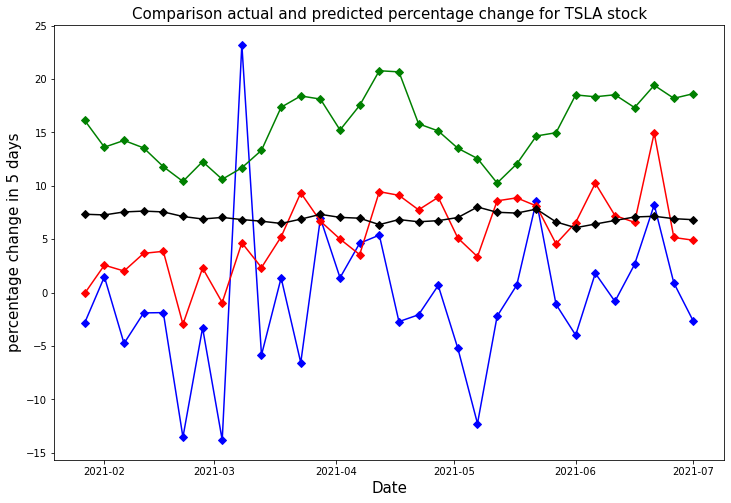

In [70]:
fig, axs = plt.subplots(1,1, figsize=(12,8))

axs.plot( (np.exp(s['TSLA_AdjClose_pred'])-1)*100, label = "actual value", color = 'blue', marker='D')
axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "LR predicted value", color = 'red', marker='D')
axs.plot( (np.exp(s['LSTM_predicted'])-1)*100, label = "LSTM predicted value", color = 'green', marker='D')
axs.plot( (np.exp(s['LSTM_tuned_predicted'])-1)*100, label = "LSTM tuned predicted value", color = 'black', marker='D')


axs.set( 
       xlabel='Date', 
       ylabel='percentage change in 5 days',
       title=f'Comparison actual and predicted percentage change for {tickers[0]} stock')
axs.xaxis.label.set_size(15)
axs.yaxis.label.set_size(15)
axs.yaxis.label.set_size(15)

axs.title.set_size(15)

In [71]:
test_results

[0.007260586210431902,
 0.004848399627421507,
 0.006308332377771895,
 0.014533533263887531,
 0.008689375936114685,
 0.006260861798786604,
 0.006742778781226758,
 0.007489617685427742,
 0.02717900598917092,
 0.007550629228876662]

In [72]:
error_Training_LSTM_tuned

0.0043396767630238964

In [73]:
test_results.append(error_Test_LSTM_tuned)
train_results.append(error_Training_LSTM_tuned)
names.append("LSTM_tuned")


In [74]:
len(test_results)

11

In [75]:
len(train_results)

11

In [76]:
len(names)

11

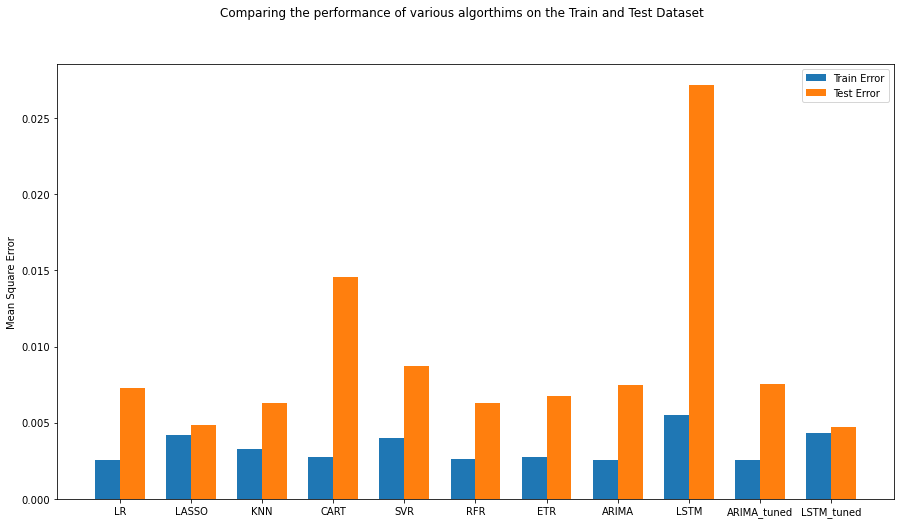

In [77]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

In [78]:
Y_test

dt
2021-01-27   -0.028582
2021-02-01    0.014681
2021-02-06   -0.048775
2021-02-11   -0.019206
2021-02-16   -0.018916
2021-02-21   -0.145506
2021-02-26   -0.033570
2021-03-03   -0.148604
2021-03-08    0.208803
2021-03-13   -0.060261
2021-03-18    0.013685
2021-03-23   -0.067870
2021-03-28    0.067251
2021-04-02    0.013837
2021-04-07    0.045181
2021-04-12    0.052448
2021-04-17   -0.027532
2021-04-22   -0.020992
2021-04-27    0.006647
2021-05-02   -0.053667
2021-05-07   -0.130873
2021-05-12   -0.022388
2021-05-17    0.006997
2021-05-22    0.082524
2021-05-27   -0.011078
2021-06-01   -0.040645
2021-06-06    0.017934
2021-06-11   -0.008265
2021-06-16    0.026044
2021-06-21    0.079008
2021-06-26    0.008964
2021-07-01   -0.027426
Name: TSLA_AdjClose_pred, dtype: float64

In [79]:
return_period = 5

baseline_pred = Y_test.diff(return_period).shift(return_period) #.dropna(inplace=True)
baseline_test = Y_test.diff(return_period)
baseline_pred

# base_line = mean_squared_error(baseline_pred, baseline_test)
# base_line

dt
2021-01-27         NaN
2021-02-01         NaN
2021-02-06         NaN
2021-02-11         NaN
2021-02-16         NaN
2021-02-21         NaN
2021-02-26         NaN
2021-03-03         NaN
2021-03-08         NaN
2021-03-13         NaN
2021-03-18   -0.116924
2021-03-23   -0.048251
2021-03-28   -0.099829
2021-04-02    0.228009
2021-04-07   -0.041344
2021-04-12    0.159191
2021-04-17   -0.034301
2021-04-22    0.215855
2021-04-27   -0.194967
2021-05-02    0.105441
2021-05-07    0.038763
2021-05-12    0.040338
2021-05-17   -0.088243
2021-05-22   -0.007190
2021-05-27   -0.098848
2021-06-01   -0.183321
2021-06-06    0.005144
2021-06-11    0.027988
2021-06-16    0.075877
2021-06-21    0.042589
2021-06-26    0.090228
2021-07-01    0.040322
Name: TSLA_AdjClose_pred, dtype: float64

In [80]:
baseline_df = pd.DataFrame(baseline_test).merge(baseline_pred, on='dt',how='outer')
baseline_df.dropna(inplace=True)
baseline_df

TSLA_AdjClose_pred_x  TSLA_AdjClose_pred_y
dt                                                    
2021-03-18              0.159191             -0.116924
2021-03-23             -0.034301             -0.048251
2021-03-28              0.215855             -0.099829
2021-04-02             -0.194967              0.228009
2021-04-07              0.105441             -0.041344
2021-04-12              0.038763              0.159191
2021-04-17              0.040338             -0.034301
2021-04-22             -0.088243              0.215855
2021-04-27             -0.007190             -0.194967
2021-05-02             -0.098848              0.105441
2021-05-07             -0.183321              0.038763
2021-05-12              0.005144              0.040338
2021-05-17              0.027988             -0.088243
2021-05-22              0.075877             -0.007190
2021-05-27              0.042589             -0.098848
2021-06-01              0.090228             -0.183321
2021-06-06              0.040322              0.005144
2021-06-11             -0.015262              0.027988
2021-06-16             -0.056480              0.075877
2021-06-21              0.090085              0.042589
2021-06-26              0.049609              0.090228
2021-07-01             -0.045360              0.040322

In [81]:
base_line = mean_squared_error(baseline_df['TSLA_AdjClose_pred_x'], baseline_df['TSLA_AdjClose_pred_y'])

In [82]:
base_line

0.034716558516228464